# Codigo Aplicado para el proyecto de DATA MINING

#Fuente de los datos:
- Medio: Kaggle
- user: Pralabh Poudel ·
- URL: https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption
- Tema: World Energy Consumption
- link_diccionario: https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv

In [1]:
#cargamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#estándarizadores
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#colocar predeterminado los resultados numéricos en 2 decimales
pd.set_option('display.float_format','{:.2f}'.format)
from scipy.stats import normaltest
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [2]:
#cargado de datos
df=pd.read_excel('World Energy Consumption.xlsx')
df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_per_capita,biofuel_elec_per_capita,coal_cons_change_pct,coal_cons_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,ZWE,15052191.00,22715353088.00,NaN,NaN,25.91,NaN,NaN,...,0.22,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN
22008,Zimbabwe,2019,ZWE,15354606.00,NaN,NaN,NaN,24.75,NaN,NaN,...,0.36,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN
22009,Zimbabwe,2020,ZWE,15669663.00,NaN,NaN,NaN,22.34,NaN,NaN,...,0.40,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN
22010,Zimbabwe,2021,ZWE,15993525.00,NaN,NaN,NaN,23.76,NaN,NaN,...,0.50,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN


In [3]:
#Estadisticas principales:
df.describe()

,population,gdp,biofuel_cons_change_pct,biofuel_cons_per_capita,biofuel_elec_per_capita,coal_cons_change_pct,coal_cons_per_capita,coal_elec_per_capita,electricity_demand,electricity_generation,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,18165.00,11113.00,1747.00,2302.00,5275.00,5258.00,4666.00,5850.00,5656.00,7191.00,...,6849.00,4035.00,2413.00,4639.00,4744.00,7065.00,7996.00,4065.00,6886.00,4101.00
mean,105066129.38,358511408959.19,46.09,133.56,64.72,24.18,6282.88,702.85,591.06,769.80,...,0.62,0.21,267.54,7.31,53.42,62.81,17.56,232.11,1.40,0.65
std,463536833.18,2411179450271.07,274.62,264.71,201.04,799.63,8652.64,1339.86,2394.90,2534.41,...,2.07,0.64,5940.94,37.33,273.26,252.73,101.69,733.84,4.49,1.89
min,1833.00,164206000.00,-100.00,0.00,0.00,-100.00,0.00,0.00,0.00,0.00,...,0.00,0.00,-100.00,-51.21,0.00,0.00,0.00,0.00,0.00,0.00
25%,1674942.00,13658978304.00,-0.62,0.00,0.00,-4.55,491.92,0.00,1.32,2.17,...,0.00,0.00,4.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,6953975.00,41674108928.00,8.18,15.48,0.15,1.22,3097.40,0.00,11.14,21.10,...,0.00,0.00,20.00,0.00,0.01,0.00,0.00,0.05,0.00,0.00
75%,25501944.00,174429519872.00,26.51,165.27,34.29,7.06,9125.25,810.02,87.39,152.15,...,0.10,0.02,47.97,0.32,2.36,2.10,0.14,45.52,0.37,0.27
max,7975105024.00,113630171365376.00,5659.33,2588.51,2514.10,55400.00,96169.94,9103.90,28527.76,28527.76,...,40.00,7.59,242384.84,665.41,5487.60,3219.85,2139.23,8422.01,56.84,26.16


In [4]:
#Verificamos los duplicados, nulos y atipicos
#número de duplicados
df.duplicated().sum()
# no hay presencia de duplicados
#verificación de nulos por columna
print(f' cantidad de nulos por columnas \n {df.isna().sum()}\n')
#verificación de nulos por filas
print(f'cantidad de filas al menos un nulo \n{(df.isna().any(axis=1)).sum()}')
#verificación de filas con alta proporción de nulos
print(f'cantidad de filas con un más del 50% del \n{(((df.isna().sum(axis=1))/df.shape[1])>0.5).sum()}')

 cantidad de nulos por columnas 
 country                       0
year                          0
iso_code                   5458
population                 3847
gdp                       10899
                          ...  
wind_elec_per_capita      14947
wind_electricity          14016
wind_energy_per_capita    17947
wind_share_elec           15126
wind_share_energy         17911
Length: 114, dtype: int64

cantidad de filas al menos un nulo 
21784
cantidad de filas con un más del 50% del 
15484


In [5]:
df['year'].dtype

dtype('O')

In [6]:
df.isna().sum()

country                       0
year                          0
iso_code                   5458
population                 3847
gdp                       10899
                          ...  
wind_elec_per_capita      14947
wind_electricity          14016
wind_energy_per_capita    17947
wind_share_elec           15126
wind_share_energy         17911
Length: 114, dtype: int64

In [7]:
df.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
       1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, ' Chile'], dtype=object)

In [8]:
#df['year']=np.where(df['year']==' Chile','',df['year'])

In [9]:
#El valor ' Chile' mezclado en la columna year indica un error 
#Se descartó un desplazamiento de columnas
#Se elimina year=Chile
df = df[df['year'] != ' Chile']
df.sort_values(by="year")

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_per_capita,biofuel_elec_per_capita,coal_cons_change_pct,coal_cons_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
9904,Italy,1900,ITA,33332371.00,109905412096.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13091,Netherlands,1900,NLD,5140189.00,27283451904.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6562,Europe,1900,NaN,406610221.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9289,Indonesia,1900,IDN,38179623.00,51910098944.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12196,Middle East (Shift),1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17635,Singapore,2022,SGP,5975689.00,NaN,NaN,NaN,63.59,-10.80,805.65,...,1.72,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN
10884,Libya,2022,LBY,6812344.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10922,Lithuania,2022,LTU,2750058.00,NaN,-10.08,481.71,236.36,3.49,812.27,...,10.31,0.84,11.05,0.38,3.94,578.17,1.59,1433.58,38.13,6.19
10597,Latin America and Caribbean (Ember),2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.73,NaN,NaN,NaN,NaN,NaN,137.07,NaN,7.74,NaN


In [10]:
df.isna().sum()

country                       0
year                          0
iso_code                   5458
population                 3847
gdp                       10857
                          ...  
wind_elec_per_capita      14905
wind_electricity          13974
wind_energy_per_capita    17905
wind_share_elec           15084
wind_share_energy         17869
Length: 114, dtype: int64

In [11]:
#crear un df de copia para procedimientos
df_copy = df.copy()

#Convertir año a categórico
df_copy["year"] = df_copy["year"].astype(str)

# Buscar columnas con palabra clave relacionadas a energía. 
# Para automatizar la imputación sin tener que escribir columna por columna.
energy_cols = [
    c for c in df_copy.columns
    if any(x in c for x in [
        "coal_", "gas_", "oil_", "biofuel_", "solar_", "wind_",
        "hydro_", "renewable", "electricity", "consumption",
        "production", "elec", "share", "twh"
    ])
]

df_copy = df_copy.sort_values(["country", "year"])

# Imputación mediante interpolación lineal dentro de cada país para las variables de energía
# Estima un valor intermedio cuando hay años previos y posteriores con datos.

for col in energy_cols:
    if df_copy[col].dtype != "O":
        df_copy[col] = (
            df_copy.groupby("country")[col]
              .transform(lambda s: s.interpolate(method="linear",
                                                 limit_direction="both"))
        )


In [12]:
# Imputación por propagación:

# imputación de población por país:
# La población no cambia de forma brusca año a año
#ffill (forward fill): rellena hacia adelante
#bfill (backward fill): rellena hacia atrás si aún queda un nulo

df_copy["population"] = (
    df_copy.sort_values("year")
      .groupby("country")["population"]
      .transform(lambda s: s.fillna(method="ffill").fillna(method="bfill"))
)


# Imputación de variables relacionadas al PBI
# Mismo método de imputacion con ffill y bfill
gdp_cols = [c for c in df_copy.columns if "gdp" in c.lower()]

for col in gdp_cols:
    df_copy[col] = (
        df_copy.sort_values("year")
          .groupby("country")[col]
          .transform(lambda s: s.fillna(method="ffill").fillna(method="bfill"))
    )

In [13]:
df_copy.isna().sum()

country                       0
year                          0
iso_code                   5458
population                 3681
gdp                        7465
                          ...  
wind_elec_per_capita       4048
wind_electricity           3042
wind_energy_per_capita    12404
wind_share_elec            3331
wind_share_energy         12077
Length: 114, dtype: int64

In [14]:
# Filtrar desde el año 2000
df_filtrada = df_copy[df_copy["year"] >= '2000'].reset_index(drop=True)

print(df_filtrada.isnull().sum())

country                      0
year                         0
iso_code                  1731
population                1427
gdp                       2863
                          ... 
wind_elec_per_capita      1521
wind_electricity           970
wind_energy_per_capita    4546
wind_share_elec           1079
wind_share_energy         4339
Length: 114, dtype: int64


In [15]:
df_filtrada.sort_values(by="year")

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_per_capita,biofuel_elec_per_capita,coal_cons_change_pct,coal_cons_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
3207,Liberia,2000,LBR,2895229.00,2767093248.00,NaN,NaN,0.00,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN
5196,Saint Lucia,2000,LCA,159513.00,1100265088.00,NaN,NaN,0.00,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN
3229,Libya,2000,LBY,5154789.00,49983479808.00,NaN,NaN,0.00,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN
644,Belgium,2000,BEL,10264351.00,345736773632.00,171.25,0.00,55.53,10.64,8639.97,...,0.00,0.00,23.08,0.01,0.05,1.95,0.02,4.61,0.02,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,Non-OPEC (EI),2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1358,Costa Rica,2022,CRI,5180836.00,73336987648.00,NaN,NaN,3.86,NaN,NaN,...,0.47,NaN,NaN,NaN,NaN,262.51,1.36,NaN,10.77,NaN
4229,North America,2022,NaN,600323657.00,NaN,3.83,772.18,131.50,-6.69,4927.83,...,4.14,1.81,13.43,149.95,1301.69,831.69,499.28,2168.32,8.86,3.88
3740,Moldova,2022,MDA,3272993.00,23299414016.00,NaN,NaN,3.06,NaN,NaN,...,0.19,NaN,NaN,NaN,NaN,24.44,0.08,NaN,1.49,NaN


In [16]:
# Crea un diccionario iso_code -> country (Solo donde country no es nulo)
iso_to_country = (
    df_filtrada.loc[df_filtrada["country"].notna(), ["iso_code", "country"]]
           .drop_duplicates()
           .set_index("iso_code")["country"]
           .to_dict()
)

# Rellena valores faltantes en country según iso_code
df_filtrada["country"] = df_filtrada.apply(
    lambda row: iso_to_country[row["iso_code"]]
                if pd.isna(row["country"]) and row["iso_code"] in iso_to_country
                else row["country"],
    axis=1
)

In [17]:
# Selecciona columnas ≤ 30% de nulos 
# para mantener solo variables con nivel aceptable de completitud
df_final= df_filtrada.copy()

porcentaje_nulos = df_final.isnull().mean()
cols_validas = df_final.columns[porcentaje_nulos <= 0.30] 
df_final = df_final[cols_validas]
df_final

,country,year,iso_code,population,biofuel_elec_per_capita,coal_elec_per_capita,electricity_demand,electricity_generation,energy_cons_change_pct,energy_cons_change_twh,...,primary_energy_consumption,renewables_elec_per_capita,renewables_electricity,renewables_share_elec,solar_elec_per_capita,solar_electricity,solar_share_elec,wind_elec_per_capita,wind_electricity,wind_share_elec
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,368.65,368.65,NaN,NaN,...,NaN,NaN,72.90,19.77,NaN,0.00,0.00,NaN,0.00,0.00
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,397.19,397.19,NaN,NaN,...,NaN,NaN,76.68,19.31,NaN,0.00,0.00,NaN,0.00,0.00
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,422.82,422.82,NaN,NaN,...,NaN,NaN,75.99,17.97,NaN,0.00,0.00,NaN,0.00,0.00
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,447.15,447.15,NaN,NaN,...,NaN,NaN,75.71,16.93,NaN,0.00,0.00,NaN,0.00,0.00
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,484.94,484.94,NaN,NaN,...,NaN,NaN,77.02,15.88,NaN,0.00,0.00,NaN,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6632,Zimbabwe,2018,ZWE,15052191.00,25.91,245.15,10.21,9.19,14.48,6.55,...,51.81,362.74,5.46,59.41,1.33,0.02,0.22,0.00,0.00,0.00
6633,Zimbabwe,2019,ZWE,15354606.00,24.75,235.76,9.35,8.24,-10.98,-5.69,...,46.12,298.28,4.58,55.58,1.95,0.03,0.36,0.00,0.00,0.00
6634,Zimbabwe,2020,ZWE,15669663.00,22.34,214.43,9.57,7.59,-8.94,-4.12,...,42.00,267.40,4.19,55.20,1.92,0.03,0.40,0.00,0.00,0.00
6635,Zimbabwe,2021,ZWE,15993525.00,23.76,223.22,9.78,8.03,0.35,0.15,...,42.15,276.36,4.42,55.04,2.50,0.04,0.50,0.00,0.00,0.00


In [18]:
df_final.isna().sum()

country                                            0
year                                               0
iso_code                                        1731
population                                      1427
biofuel_elec_per_capita                         1631
coal_elec_per_capita                            1608
electricity_demand                              1290
electricity_generation                           991
energy_cons_change_pct                           732
energy_cons_change_twh                           558
energy_per_capita                               1527
fossil_elec_per_capita                          1542
fossil_electricity                              1083
fossil_share_elec                               1171
gas_elec_per_capita                             1608
gas_electricity                                 1149
gas_prod_change_twh                             1032
gas_prod_per_capita                             1477
gas_production                                

In [19]:
df_final.dropna(inplace=True)

In [20]:
df_final

,country,year,iso_code,population,biofuel_elec_per_capita,coal_elec_per_capita,electricity_demand,electricity_generation,energy_cons_change_pct,energy_cons_change_twh,...,primary_energy_consumption,renewables_elec_per_capita,renewables_electricity,renewables_share_elec,solar_elec_per_capita,solar_electricity,solar_share_elec,wind_elec_per_capita,wind_electricity,wind_share_elec
23,Afghanistan,2000,AFG,19542986.00,0.00,0.00,0.57,0.47,-12.37,-0.83,...,5.91,15.86,0.31,65.96,0.00,0.00,0.00,0.00,0.00,0.00
24,Afghanistan,2001,AFG,19688634.00,0.00,0.00,0.69,0.59,-21.13,-1.25,...,4.66,25.39,0.50,84.75,0.00,0.00,0.00,0.00,0.00,0.00
25,Afghanistan,2002,AFG,21000258.00,0.00,0.00,0.79,0.69,-5.06,-0.24,...,4.43,26.67,0.56,81.16,0.00,0.00,0.00,0.00,0.00,0.00
26,Afghanistan,2003,AFG,22645136.00,0.00,0.00,1.04,0.94,17.60,0.78,...,5.21,27.82,0.63,67.02,0.00,0.00,0.00,0.00,0.00,0.00
27,Afghanistan,2004,AFG,23553554.00,0.00,0.00,0.99,0.89,-7.63,-0.40,...,4.81,23.78,0.56,62.92,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,Zimbabwe,2017,ZWE,14751101.00,21.69,204.73,9.57,7.35,-2.98,-1.39,...,45.26,291.50,4.30,58.50,0.68,0.01,0.14,0.00,0.00,0.00
6632,Zimbabwe,2018,ZWE,15052191.00,25.91,245.15,10.21,9.19,14.48,6.55,...,51.81,362.74,5.46,59.41,1.33,0.02,0.22,0.00,0.00,0.00
6633,Zimbabwe,2019,ZWE,15354606.00,24.75,235.76,9.35,8.24,-10.98,-5.69,...,46.12,298.28,4.58,55.58,1.95,0.03,0.36,0.00,0.00,0.00
6634,Zimbabwe,2020,ZWE,15669663.00,22.34,214.43,9.57,7.59,-8.94,-4.12,...,42.00,267.40,4.19,55.20,1.92,0.03,0.40,0.00,0.00,0.00


In [21]:
#columnas de la data
df_final.columns

Index(['country', 'year', 'iso_code', 'population', 'biofuel_elec_per_capita',
       'coal_elec_per_capita', 'electricity_demand', 'electricity_generation',
       'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita',
       'fossil_elec_per_capita', 'fossil_electricity', 'fossil_share_elec',
       'gas_elec_per_capita', 'gas_electricity', 'gas_prod_change_twh',
       'gas_prod_per_capita', 'gas_production', 'gas_share_elec',
       'greenhouse_gas_emissions', 'hydro_elec_per_capita',
       'hydro_electricity', 'hydro_share_elec', 'low_carbon_elec_per_capita',
       'low_carbon_electricity', 'low_carbon_share_elec', 'net_elec_imports',
       'net_elec_imports_share_demand', 'nuclear_elec_per_capita',
       'nuclear_electricity', 'nuclear_share_elec', 'oil_elec_per_capita',
       'oil_electricity', 'oil_prod_change_twh', 'oil_prod_per_capita',
       'oil_production', 'oil_share_elec', 'other_renewable_electricity',
       'other_renewable_exc_biofuel_electric

In [22]:
#tipos de dato de la data World Energy Consumption
print(df_final.dtypes)

print(f"\n cantidad de columnas categoricas {df_final.select_dtypes(include='object').shape[1]}")
print(f"\n cantidad de columnas numéricas {df_final.select_dtypes(include='number').shape[1]}")

country                                          object
year                                             object
iso_code                                         object
population                                      float64
biofuel_elec_per_capita                         float64
coal_elec_per_capita                            float64
electricity_demand                              float64
electricity_generation                          float64
energy_cons_change_pct                          float64
energy_cons_change_twh                          float64
energy_per_capita                               float64
fossil_elec_per_capita                          float64
fossil_electricity                              float64
fossil_share_elec                               float64
gas_elec_per_capita                             float64
gas_electricity                                 float64
gas_prod_change_twh                             float64
gas_prod_per_capita                             

In [23]:
df_final_seleccion=df_final.copy()

col_select=['country','year','electricity_demand','electricity_generation','fossil_electricity','gas_electricity','greenhouse_gas_emissions','hydro_electricity','low_carbon_electricity','nuclear_electricity','oil_electricity','other_renewable_electricity','renewables_electricity','solar_electricity','wind_electricity']

df_final_seleccion=df_final_seleccion[col_select]

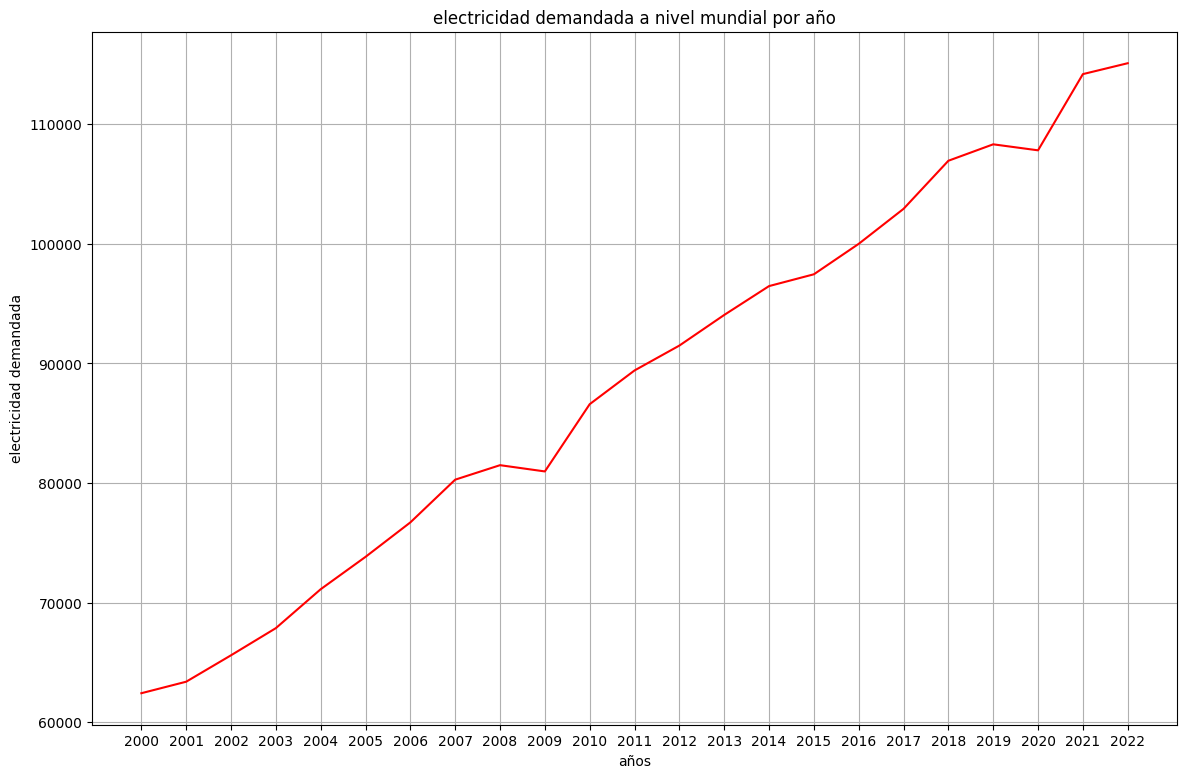

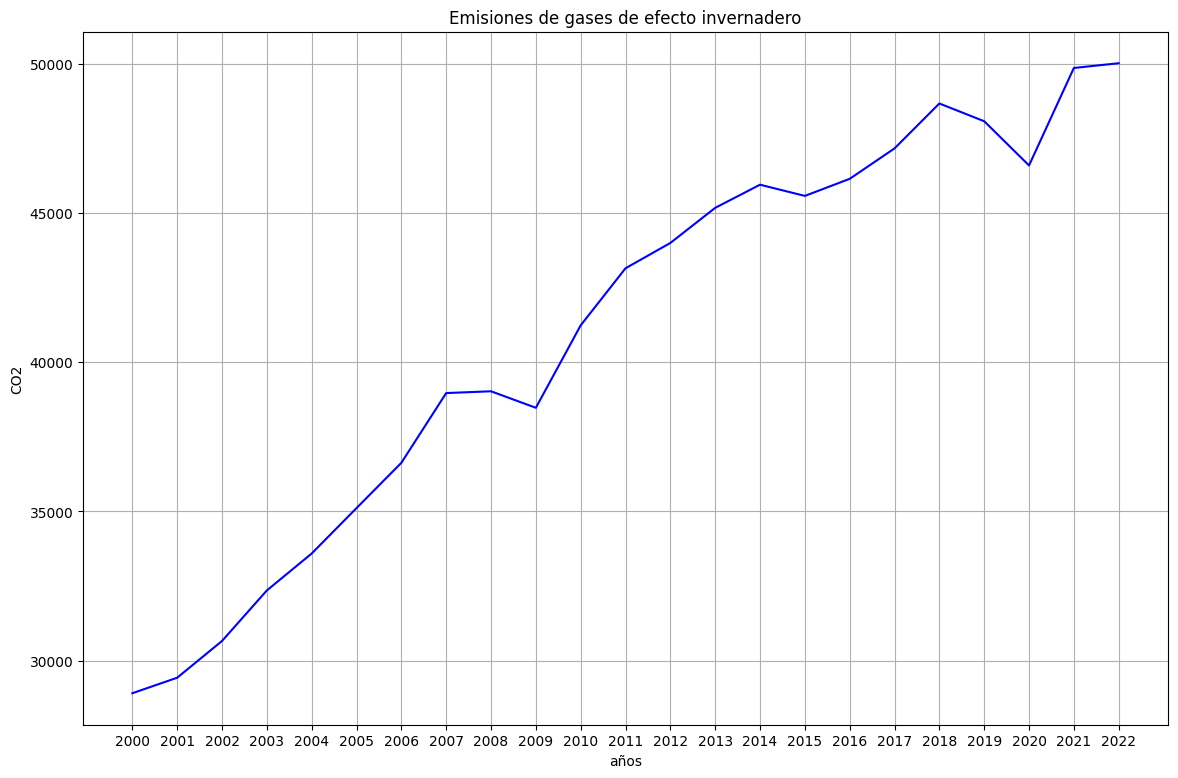

In [ ]:
import matplotlib.pyplot as plt

colum=['electricity_demand','electricity_generation','fossil_electricity','gas_electricity','greenhouse_gas_emissions','hydro_electricity','low_carbon_electricity','nuclear_electricity','oil_electricity','other_renewable_electricity','renewables_electricity','solar_electricity','wind_electricity']
titulo=['electricidad demandada a nivel mundial por año','electricidad generada a nivel mundial por año','Electricidad generada por fuentes fósiles','Electricidad generada por gas natural','Emisiones de gases de efecto invernadero','Electricidad generada por energía hidroeléctrica','Electricidad de baja emisión de carbono','Electricidad generada por energía nuclear','Electricidad generada por petróleo','Electricidad generada por otras energías renovables','Electricidad generada por energías renovables','Electricidad generada por energía solar','Electricidad generada por energía eólica']


valores=df_final_seleccion[['year','electricity_demand']].groupby('year').sum().values
años=range(len(valores))
plt.figure(figsize=(14,9))
plt.plot(años,valores, color='red')
plt.title('electricidad demandada a nivel mundial por año')
plt.xticks(años,df_final_seleccion['year'].unique())
plt.xlabel('años')
plt.ylabel('electricidad demandada')
plt.grid()

valores=df_final_seleccion[['year','greenhouse_gas_emissions']].groupby('year').sum().values
años=range(len(valores))
plt.figure(figsize=(14,9))
plt.plot(años,valores, color='blue')
plt.title('Emisiones de gases de efecto invernadero')
plt.xticks(años,df_final_seleccion['year'].unique())
plt.xlabel('años')
plt.ylabel('CO2')
plt.grid()


In [24]:
df_transformado=df_final_seleccion.copy()

col_transform=['electricity_demand','electricity_generation','fossil_electricity','gas_electricity','greenhouse_gas_emissions','hydro_electricity','low_carbon_electricity','nuclear_electricity','oil_electricity','other_renewable_electricity','renewables_electricity','solar_electricity','wind_electricity']
for col in col_transform:
    df_transformado[f'{col}_per_capita']=0
    df_transformado.loc[:,f'{col}_per_capita']=df_final[col]/df_final['population']

df_transformado.drop(columns=col_transform, axis=1,inplace=True)


In [25]:
df_transformado

,country,year,electricity_demand_per_capita,electricity_generation_per_capita,fossil_electricity_per_capita,gas_electricity_per_capita,greenhouse_gas_emissions_per_capita,hydro_electricity_per_capita,low_carbon_electricity_per_capita,nuclear_electricity_per_capita,oil_electricity_per_capita,other_renewable_electricity_per_capita,renewables_electricity_per_capita,solar_electricity_per_capita,wind_electricity_per_capita
23,Afghanistan,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
24,Afghanistan,2001,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25,Afghanistan,2002,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
26,Afghanistan,2003,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
27,Afghanistan,2004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,Zimbabwe,2017,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6632,Zimbabwe,2018,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6633,Zimbabwe,2019,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6634,Zimbabwe,2020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


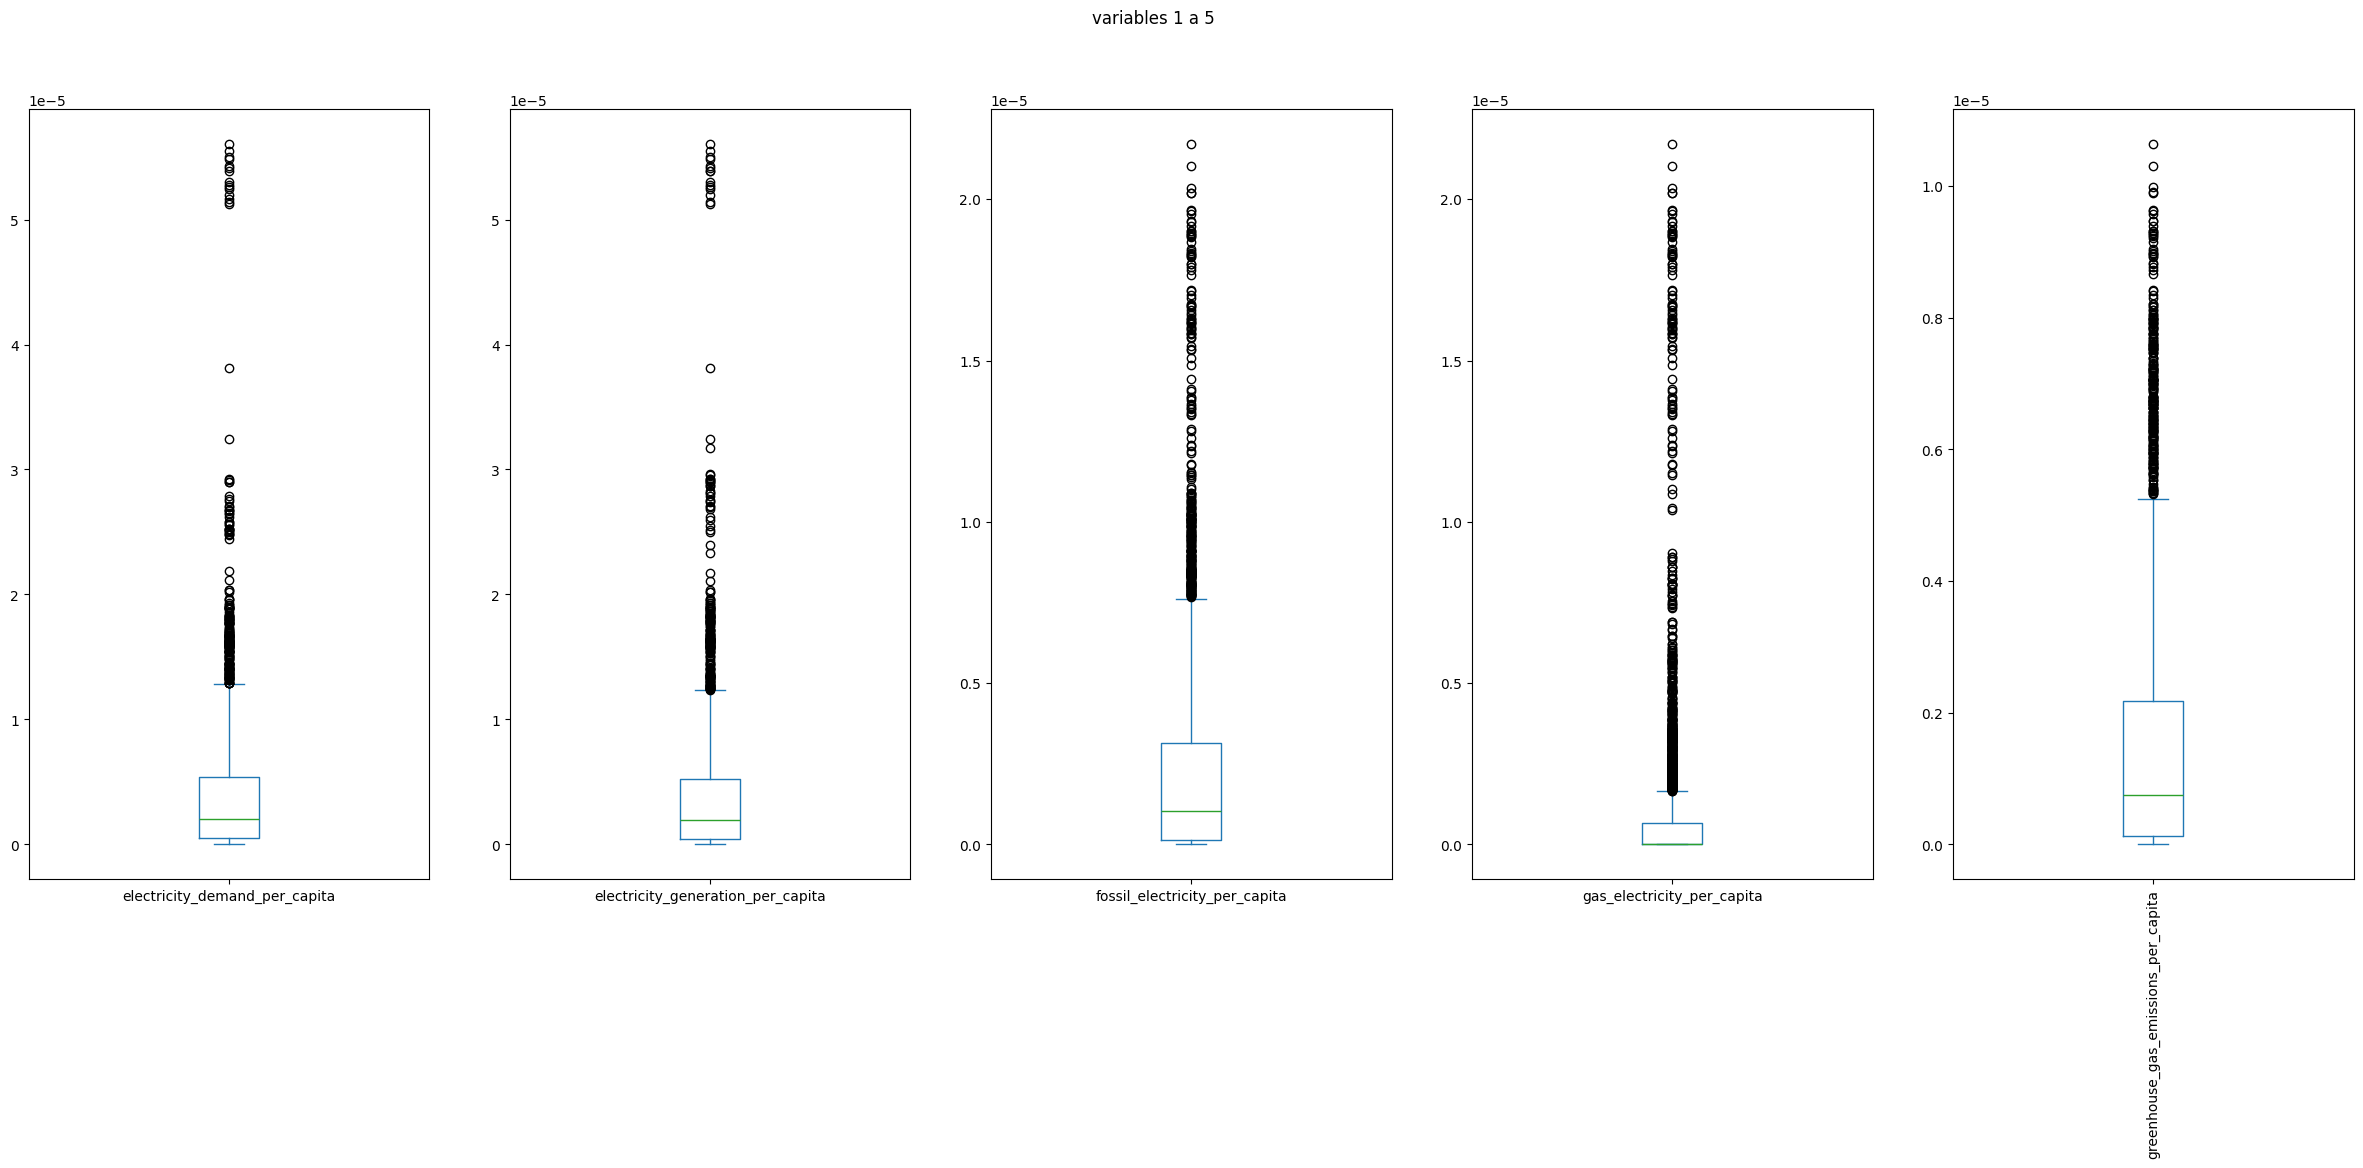

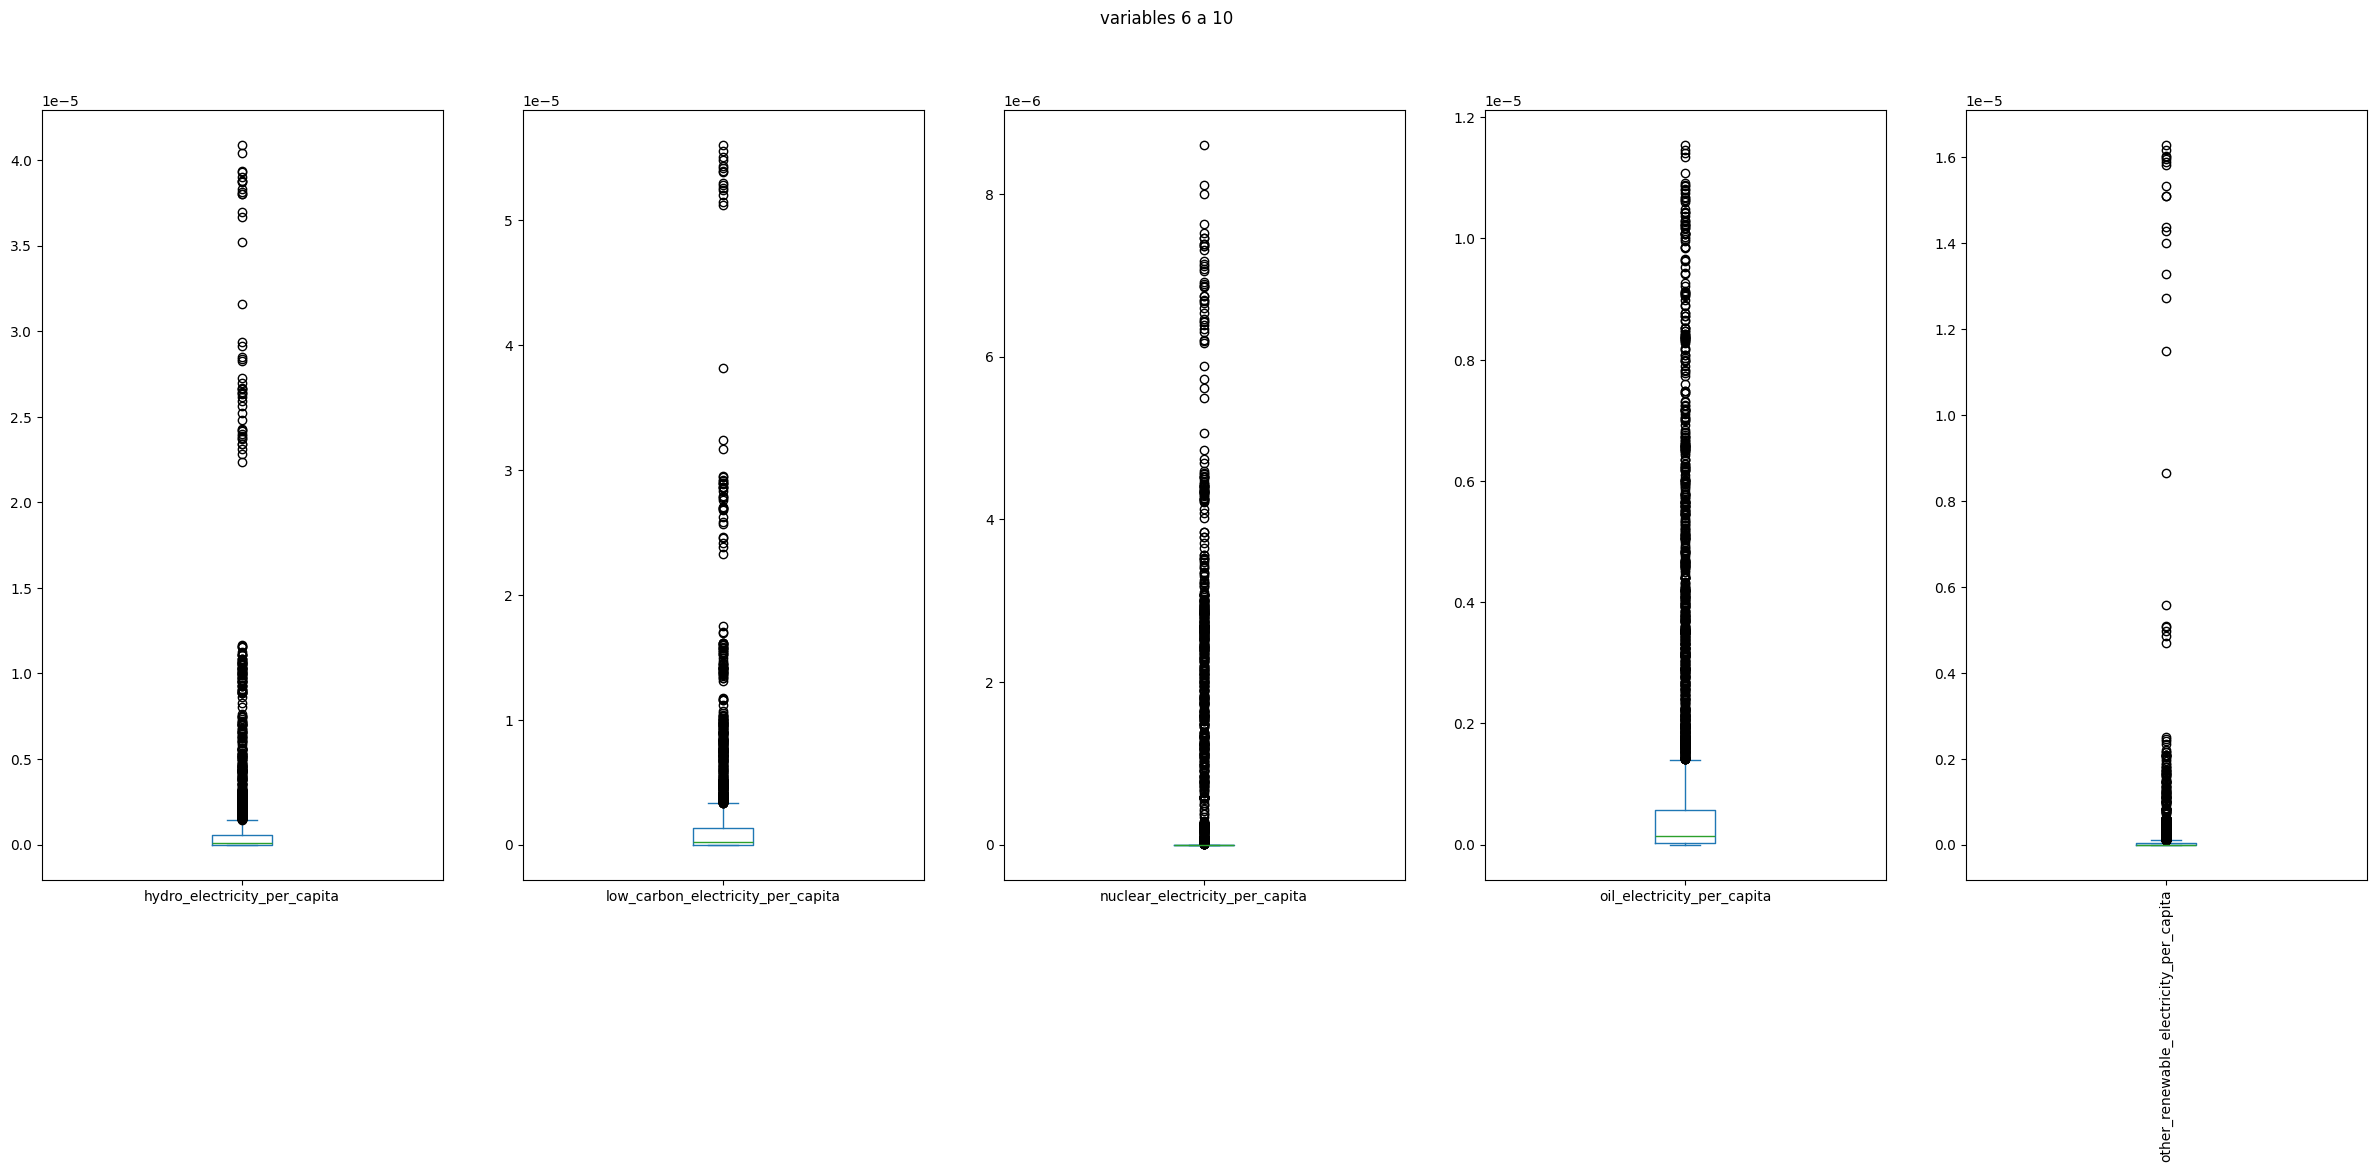

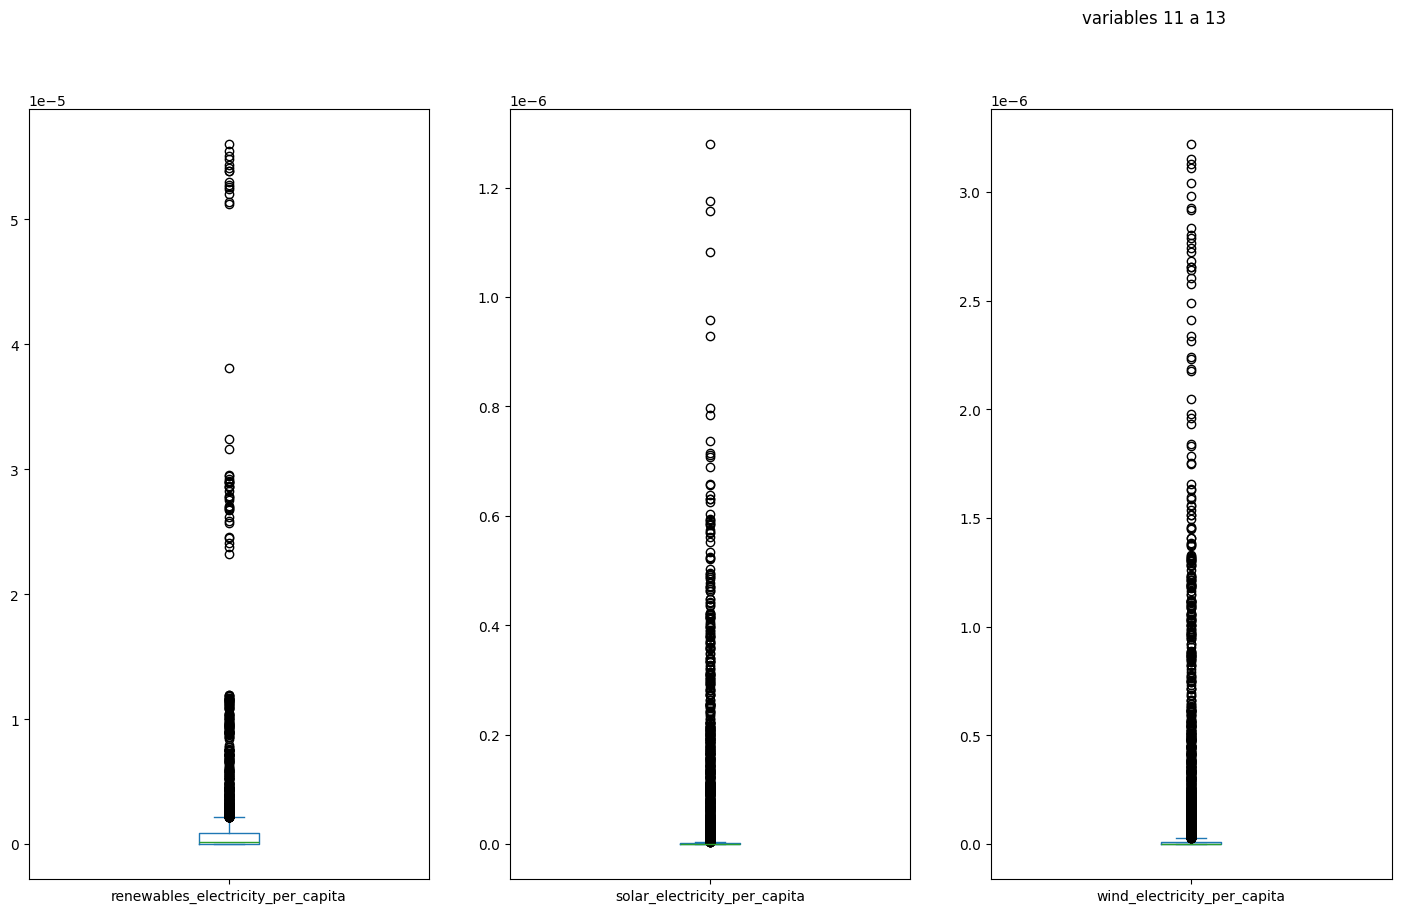

In [26]:
# verificamos las distribuciones de los datos

#columnas numéricas
num_cols=df_transformado.select_dtypes(include='number').columns
# tamaño de la lote
batch_size=5

for i in range(0,len(num_cols),batch_size):
    cols_batch=num_cols[i:i+batch_size]
    df_transformado[cols_batch].plot(kind='box',subplots=True,layout=(1,batch_size), figsize=(30,10), sharex=False)
    plt.suptitle(f'variables {i+1} a {i+len(cols_batch)}')
    plt.xticks(rotation=90)
    plt.show()

In [27]:
#altas asimetrías
df_transformado.select_dtypes(include='number').skew()
print(f"número de variables con alta asimetría {((df_transformado.select_dtypes(include='number').skew()>0.85)|(df_transformado.select_dtypes(include='number').skew()<-0.85)).sum()}")


número de variables con alta asimetría 11


In [28]:
#Verificamos los duplicados, nulos y atipicos
#número de duplicados
df_transformado.duplicated().sum()
df_transformado.drop_duplicates(inplace=True)
# no hay presencia de duplicados
#verificación de nulos por columna
print(f' cantidad de nulos por columnas \n {df_transformado.isna().sum()}\n')
#verificación de nulos por filas
print(f'cantidad de filas al menos un nulo \n{(df_transformado.isna().any(axis=1)).sum()}')
#verificación de filas con alta proporción de nulos
print(f'cantidad de filas con un más del 50% del \n{(((df_transformado.isna().sum(axis=1))/df_transformado.shape[1])>0.5).sum()}')

 cantidad de nulos por columnas 
 country                                   0
year                                      0
electricity_demand_per_capita             0
electricity_generation_per_capita         0
fossil_electricity_per_capita             0
gas_electricity_per_capita                0
greenhouse_gas_emissions_per_capita       0
hydro_electricity_per_capita              0
low_carbon_electricity_per_capita         0
nuclear_electricity_per_capita            0
oil_electricity_per_capita                0
other_renewable_electricity_per_capita    0
renewables_electricity_per_capita         0
solar_electricity_per_capita              0
wind_electricity_per_capita               0
dtype: int64

cantidad de filas al menos un nulo 
0
cantidad de filas con un más del 50% del 
0


In [29]:
df_final_seleccion.skew(numeric_only=True)

electricity_demand            10.41
electricity_generation        10.31
fossil_electricity            10.83
gas_electricity               10.87
greenhouse_gas_emissions      11.17
hydro_electricity              6.27
low_carbon_electricity         8.14
nuclear_electricity            8.99
oil_electricity                7.97
other_renewable_electricity    6.93
renewables_electricity         7.05
solar_electricity             16.68
wind_electricity              15.99
dtype: float64

## Outliers

In [30]:
num_cols = df_transformado.select_dtypes(include=[np.number]).columns

# Aplicar winsorizing manual usando 3*IQR
for col in num_cols:
    Q1 = df_transformado[col].quantile(0.25)
    Q3 = df_transformado[col].quantile(0.75)
    IQR = Q3 - Q1

    # se aplica 3 en vez de 1.5
    lower = Q1 - 3 * IQR
    upper = Q3 + 3 * IQR

    # Winsorize (capar)
    df_transformado[col] = df_transformado[col].clip(lower, upper)

In [31]:
df_transformado

,country,year,electricity_demand_per_capita,electricity_generation_per_capita,fossil_electricity_per_capita,gas_electricity_per_capita,greenhouse_gas_emissions_per_capita,hydro_electricity_per_capita,low_carbon_electricity_per_capita,nuclear_electricity_per_capita,oil_electricity_per_capita,other_renewable_electricity_per_capita,renewables_electricity_per_capita,solar_electricity_per_capita,wind_electricity_per_capita
23,Afghanistan,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
24,Afghanistan,2001,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25,Afghanistan,2002,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
26,Afghanistan,2003,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
27,Afghanistan,2004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,Zimbabwe,2017,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6632,Zimbabwe,2018,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6633,Zimbabwe,2019,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6634,Zimbabwe,2020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


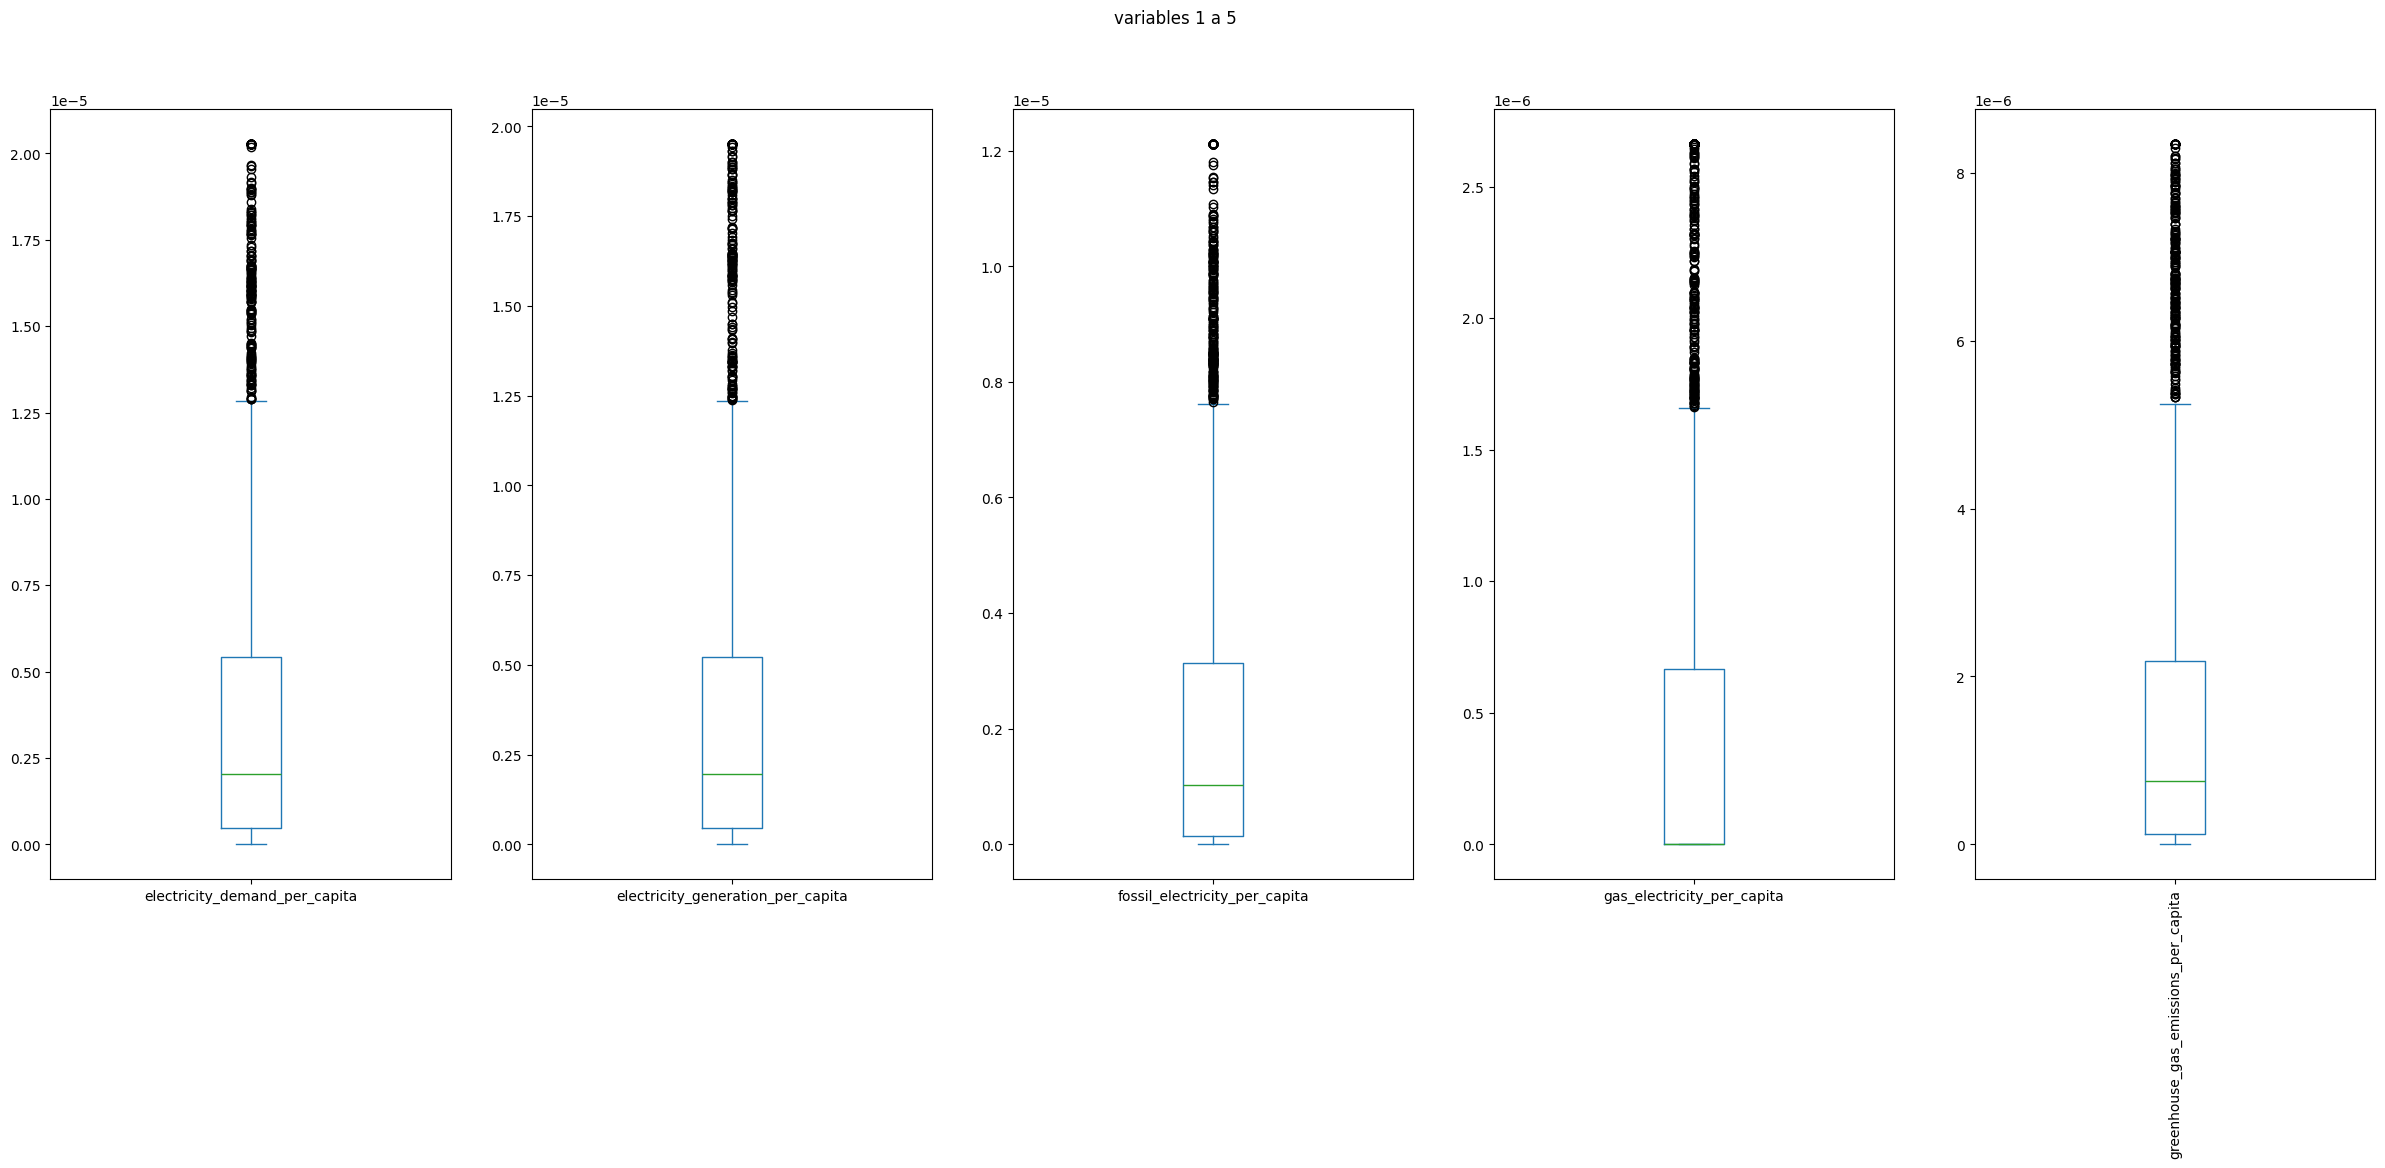

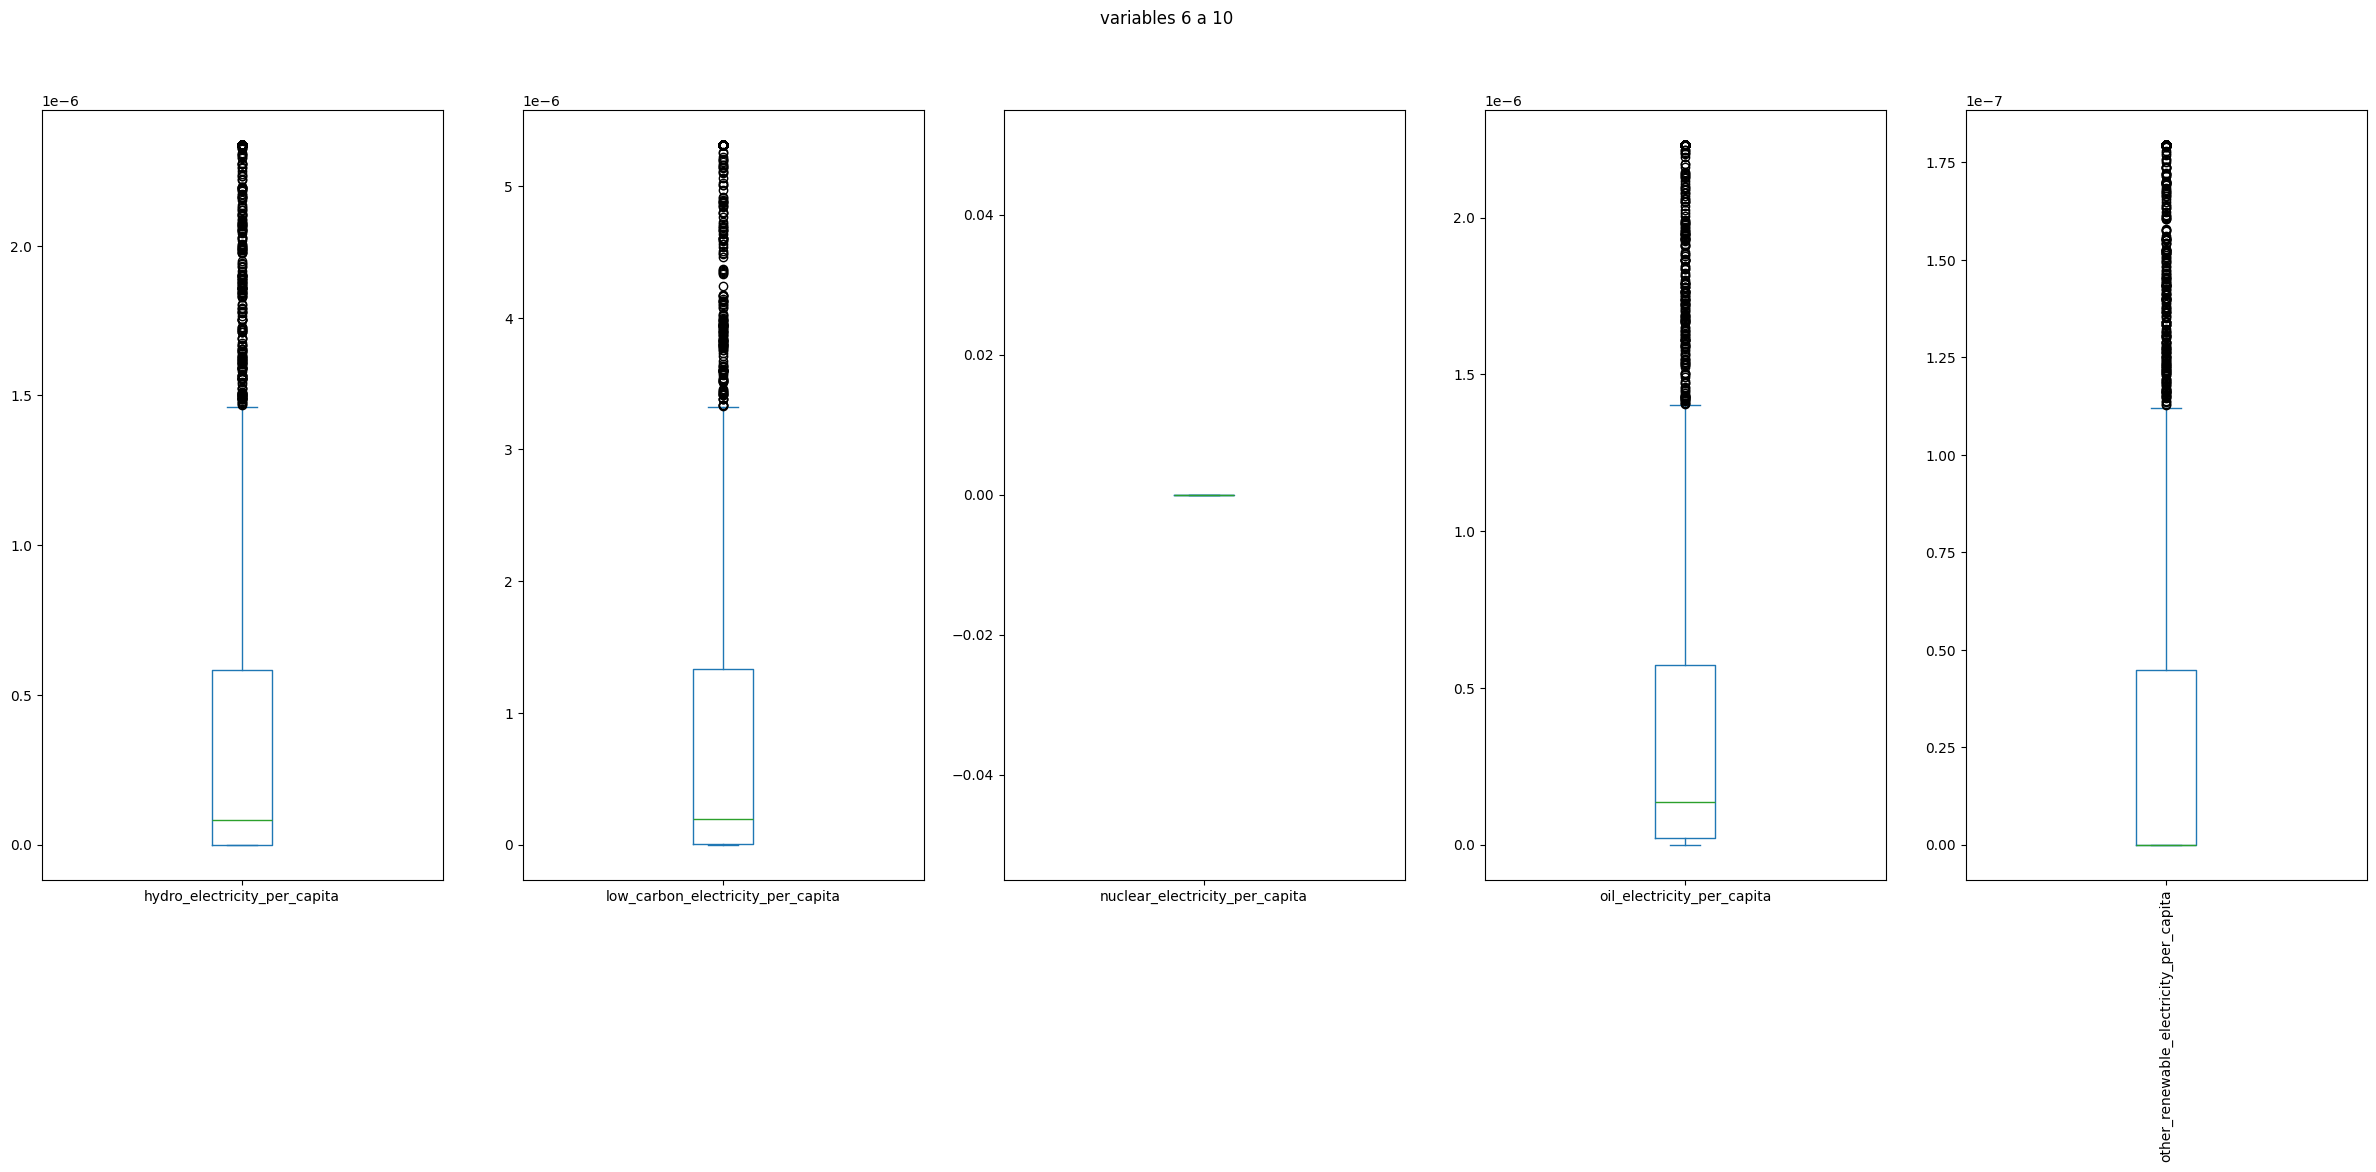

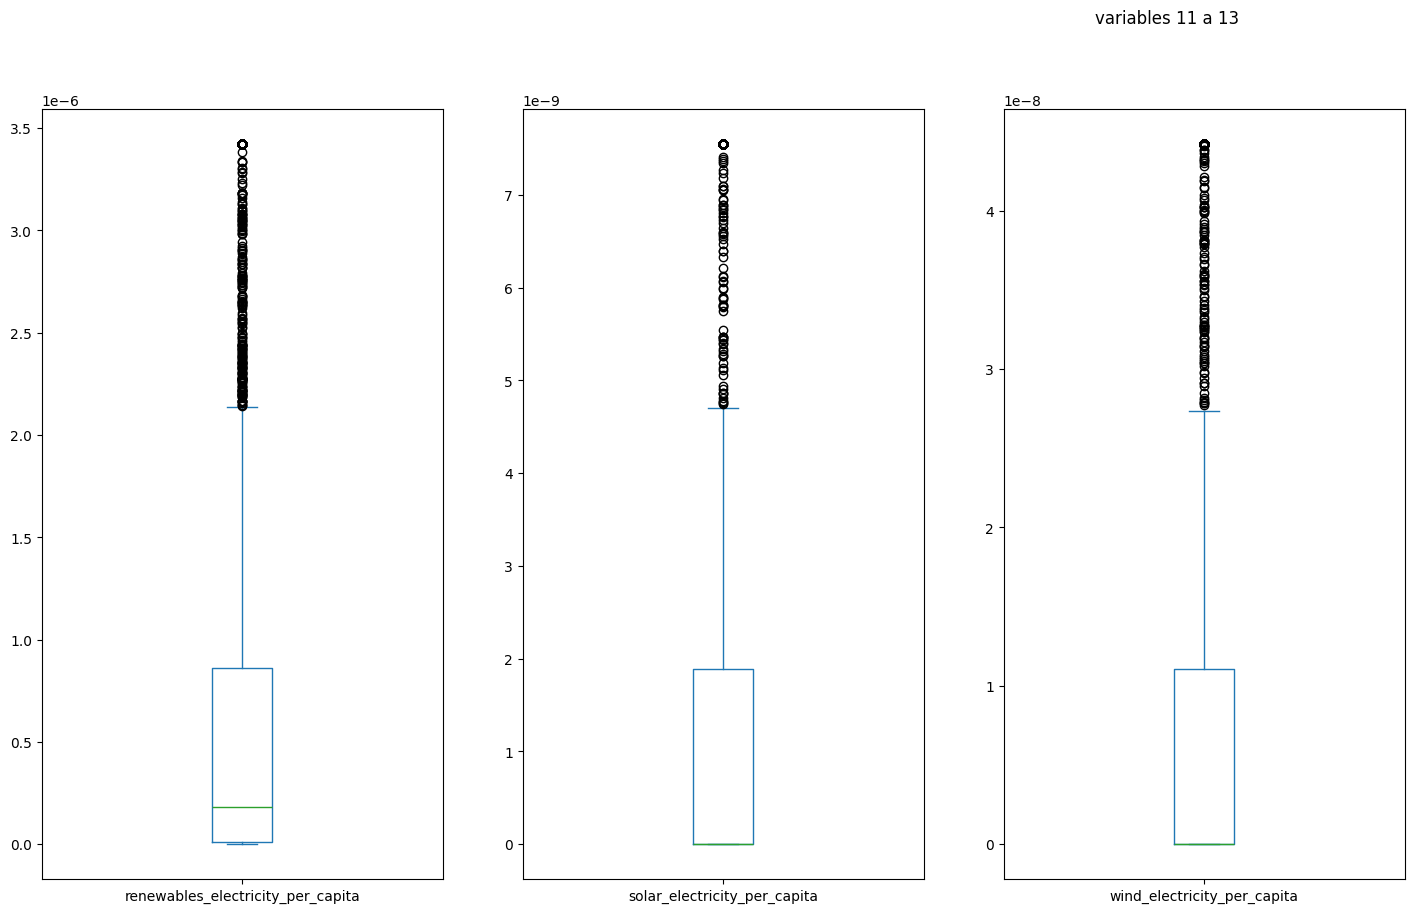

In [32]:
# verificamos las distribuciones de los datos después de tratamiento de outliers

#columnas numéricas
num_cols=df_transformado.select_dtypes(include='number').columns
# tamaño de la lote
batch_size=5

for i in range(0,len(num_cols),batch_size):
    cols_batch=num_cols[i:i+batch_size]
    df_transformado[cols_batch].plot(kind='box',subplots=True,layout=(1,batch_size), figsize=(30,10), sharex=False)
    plt.suptitle(f'variables {i+1} a {i+len(cols_batch)}')
    plt.xticks(rotation=90)
    plt.show()

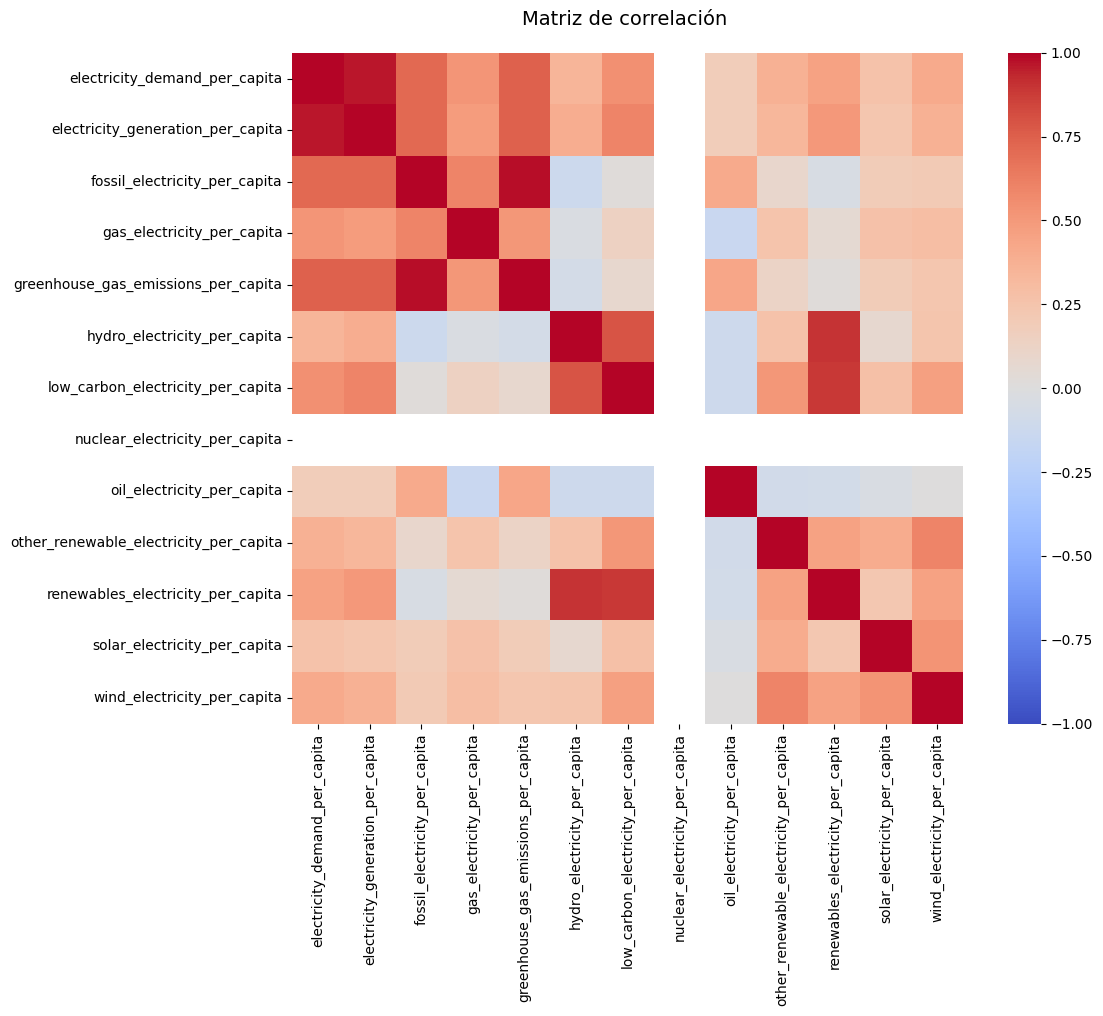

In [33]:
# --- Matriz de correlaciones ---
corr = df_transformado.corr(numeric_only=True)
# --- Plot mejorado ---
plt.figure(figsize=(12,10))
sns.heatmap(corr,
            cmap="coolwarm",
            vmin=-1, vmax=1,
            annot=False,
            cbar=True,
            square=True,
            )

plt.title("Matriz de correlación ", fontsize=14, pad=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [34]:
#Convertir a formato tabular (pares de variables)
corr_pairs = corr.unstack().reset_index()
corr_pairs.columns = ['Variable_1', 'Variable_2', 'Correlacion']

#Filtrar correlaciones altas
corr_pairs = corr_pairs[
    (corr_pairs['Variable_1'] != corr_pairs['Variable_2']) &
    (corr_pairs['Correlacion'].abs() > 0.7)
]

#Crear una clave ordenada para evitar duplicados tipo A–B / B–A
corr_pairs['Par'] = corr_pairs.apply(
    lambda x: '-'.join(sorted([x['Variable_1'], x['Variable_2']])), axis=1
)

#Eliminar duplicados usando esa clave
corr_pairs = corr_pairs.drop_duplicates(subset=['Par']).drop(columns='Par')

#Ordenar por correlación descendente
corr_pairs = corr_pairs.sort_values(by='Correlacion', ascending=False).reset_index(drop=True)
corr_pairs

,Variable_1,Variable_2,Correlacion
0,fossil_electricity_per_capita,greenhouse_gas_emissions_per_capita,0.98
1,electricity_demand_per_capita,electricity_generation_per_capita,0.96
2,hydro_electricity_per_capita,renewables_electricity_per_capita,0.91
3,low_carbon_electricity_per_capita,renewables_electricity_per_capita,0.89
4,hydro_electricity_per_capita,low_carbon_electricity_per_capita,0.79
5,electricity_generation_per_capita,greenhouse_gas_emissions_per_capita,0.75
6,electricity_demand_per_capita,greenhouse_gas_emissions_per_capita,0.74
7,electricity_demand_per_capita,fossil_electricity_per_capita,0.71
8,electricity_generation_per_capita,fossil_electricity_per_capita,0.71


In [35]:
df_final_escalado=df_transformado.copy()
num_cols = df_final_escalado.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df_final_escalado[num_cols] = scaler.fit_transform(df_final_escalado[num_cols])

In [36]:
df_final_escalado

,country,year,electricity_demand_per_capita,electricity_generation_per_capita,fossil_electricity_per_capita,gas_electricity_per_capita,greenhouse_gas_emissions_per_capita,hydro_electricity_per_capita,low_carbon_electricity_per_capita,nuclear_electricity_per_capita,oil_electricity_per_capita,other_renewable_electricity_per_capita,renewables_electricity_per_capita,solar_electricity_per_capita,wind_electricity_per_capita
23,Afghanistan,2000,-0.84,-0.84,-0.77,-0.60,-0.78,-0.60,-0.63,0.00,-0.68,-0.59,-0.65,-0.59,-0.58
24,Afghanistan,2001,-0.84,-0.84,-0.77,-0.60,-0.79,-0.59,-0.62,0.00,-0.68,-0.59,-0.64,-0.59,-0.58
25,Afghanistan,2002,-0.84,-0.83,-0.77,-0.60,-0.79,-0.58,-0.62,0.00,-0.68,-0.59,-0.64,-0.59,-0.58
26,Afghanistan,2003,-0.84,-0.83,-0.76,-0.60,-0.78,-0.58,-0.62,0.00,-0.67,-0.59,-0.64,-0.59,-0.58
27,Afghanistan,2004,-0.84,-0.83,-0.76,-0.60,-0.78,-0.59,-0.62,0.00,-0.67,-0.59,-0.65,-0.59,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,Zimbabwe,2017,-0.70,-0.72,-0.70,-0.60,-0.69,-0.24,-0.44,0.00,-0.69,-0.25,-0.37,-0.36,-0.58
6632,Zimbabwe,2018,-0.69,-0.70,-0.68,-0.60,-0.67,-0.15,-0.40,0.00,-0.68,-0.19,-0.30,-0.14,-0.58
6633,Zimbabwe,2019,-0.71,-0.71,-0.68,-0.60,-0.68,-0.24,-0.44,0.00,-0.68,-0.21,-0.37,0.07,-0.58
6634,Zimbabwe,2020,-0.71,-0.73,-0.69,-0.60,-0.69,-0.28,-0.46,0.00,-0.68,-0.24,-0.40,0.05,-0.58


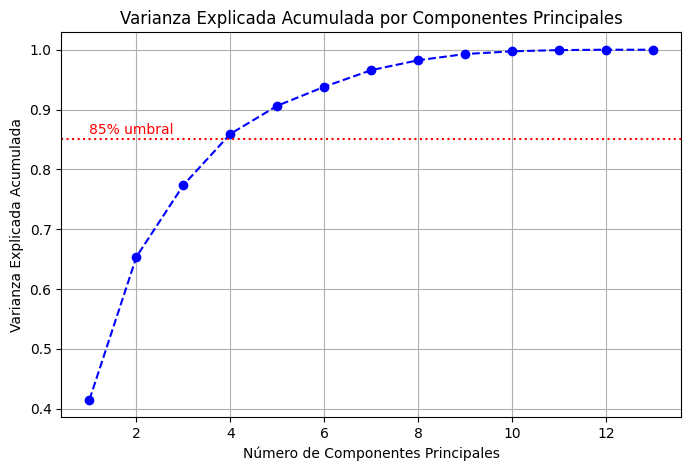

In [37]:
# Seleccionar solo columnas numéricas
num_cols = df_final_escalado.select_dtypes(include=['number']).columns
df_num = df_final_escalado[num_cols]

# Crear PCA sin limitar el número de componentes (usará todos)
pca = PCA()

# Ajustar PCA a tus datos
pca.fit(df_num)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(8,5))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.axhline(y=0.85, color='r', linestyle=':')  # Línea de referencia al 85%
plt.text(1, 0.86, '85% umbral', color = 'r')
# Limitar ejes
plt.show()

In [38]:
varianza_acumulada

array([0.41480574, 0.65375004, 0.77371121, 0.85926112, 0.90634109,
       0.93809505, 0.96584181, 0.98241103, 0.99282113, 0.99727301,
       0.99942249, 1.        , 1.        ])

In [39]:
# Seleccionar solo columnas numéricas
num_cols = df_final_seleccion.select_dtypes(include=['number']).columns
df_num = df_final_seleccion[num_cols]

# aplica transformacion PCA
pca = PCA(n_components=4) # define el transformador PCA con n_componentes
fit_pca = pca.fit(df_num)
df_post_pca = fit_pca.transform(df_num) # ajusta el transformador PCA con los dato

In [40]:
fit_pca.explained_variance_ratio_

array([0.96877036, 0.02050733, 0.00538714, 0.00403077])

In [41]:
# Acceder a las cargas factoriales
cargas_factoriales = pd.DataFrame(fit_pca.components_, columns=df_num.columns).T

# Mostrar las cargas factoriales
print(cargas_factoriales)

                               0     1     2     3
electricity_demand          0.59  0.06  0.01 -0.01
electricity_generation      0.59  0.09  0.09  0.00
fossil_electricity          0.38 -0.45 -0.14 -0.13
gas_electricity             0.16 -0.08 -0.54  0.72
greenhouse_gas_emissions    0.27 -0.33  0.06 -0.35
hydro_electricity           0.05  0.38 -0.26 -0.40
low_carbon_electricity      0.20  0.55  0.23  0.14
nuclear_electricity         0.11  0.09  0.62  0.32
oil_electricity             0.01 -0.02 -0.01 -0.05
other_renewable_electricity 0.01  0.01 -0.01 -0.03
renewables_electricity      0.09  0.46 -0.39 -0.18
solar_electricity           0.01  0.01 -0.05  0.07
wind_electricity            0.02  0.04 -0.07  0.17


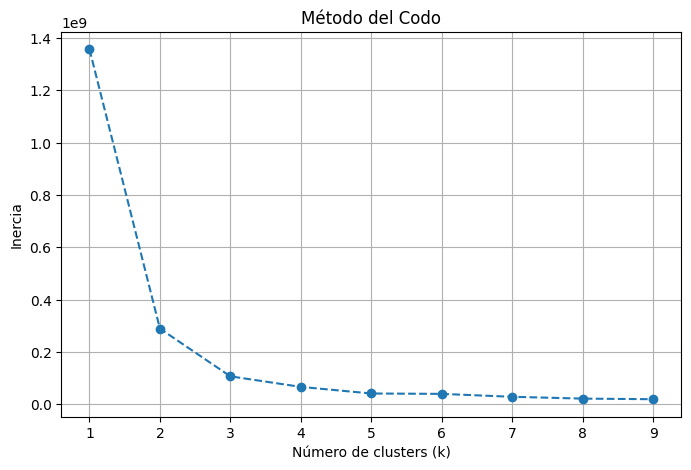

In [42]:
from sklearn.metrics import silhouette_score

SIL_SCORE=[]
inertias = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_post_pca)
    sil_score=silhouette_score(df_post_pca,kmeans.labels_)
    inertias.append(kmeans.inertia_)
    SIL_SCORE.append(sil_score)
    print(f' la métrica de la silueta para un número de clusters {k} es: {sil_score}')


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

## KMEANS

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_post_pca)
inertias.append(kmeans.inertia_)

In [44]:
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], shape=(4449,), dtype=int32)

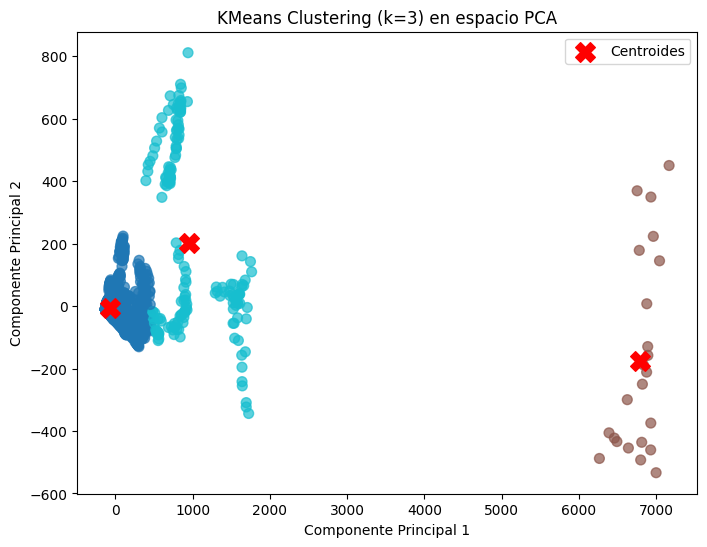

In [45]:
# Predecir clusters
labels = kmeans.predict(df_post_pca)

# Gráfico 2D
plt.figure(figsize=(8,6))
plt.scatter(df_post_pca[:, 0], df_post_pca[:, 1],
            c=labels, cmap="tab10", s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c="red", marker="X", s=200, label="Centroides")

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title(f"KMeans Clustering (k={3}) en espacio PCA")
plt.legend()
plt.show()


## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics  import silhouette_score
import numpy as np 

radio=np.arange(8,20,0.5)
samples=range(3,100,10)


for r in radio:
    for s in samples:
        dbscan=DBSCAN(eps=r,min_samples=s)
        labels=dbscan.fit_predict(df_post_pca)
        sil_score=silhouette_score(df_post_pca,labels)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(f'para un radio de {r} y un mínimo de muestras {s}, se obtiene una metrica de la silueta de: {sil_score} con un número de clusters de: {n_clusters}')

In [57]:
df_analisis=df_final_seleccion.copy()

df_analisis['cluster']=labels
df_analisis['población']=df_final['population']

In [58]:
df_analisis.loc[df_analisis['cluster']==2].describe()

,electricity_demand,electricity_generation,fossil_electricity,gas_electricity,greenhouse_gas_emissions,hydro_electricity,low_carbon_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,renewables_electricity,solar_electricity,wind_electricity,cluster,población
count,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00
mean,648.28,659.35,323.95,154.74,220.73,144.72,335.40,149.67,27.54,16.11,185.73,8.60,16.30,2.00,98151582.88
std,219.43,220.48,245.55,153.22,153.68,145.29,141.77,126.38,38.70,15.75,149.88,17.56,26.53,0.00,53661642.41
min,351.92,323.17,28.87,3.84,29.67,2.12,74.34,0.00,2.58,0.13,3.94,0.00,0.00,2.00,30683316.00
25%,505.44,538.54,106.42,41.23,81.00,19.88,224.75,69.14,9.71,4.75,63.85,0.01,0.67,2.00,58932410.00
50%,581.08,588.94,290.59,82.55,197.22,78.81,341.03,125.36,13.60,9.57,156.43,0.83,4.07,2.00,81346808.00
75%,847.09,857.83,557.57,220.80,337.85,301.96,471.73,170.46,23.46,22.12,311.32,6.58,21.45,2.00,143203120.00
max,1101.80,1114.93,920.39,503.44,603.25,428.33,606.50,451.53,195.62,57.60,591.96,98.69,132.10,2.00,215313504.00


In [59]:
df_analisis.loc[df_analisis['cluster']==1].describe()

,electricity_demand,electricity_generation,fossil_electricity,gas_electricity,greenhouse_gas_emissions,hydro_electricity,low_carbon_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,renewables_electricity,solar_electricity,wind_electricity,cluster,población
count,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00
mean,4078.15,4040.84,2727.05,1087.73,1902.43,264.00,1313.79,789.30,65.98,74.62,524.49,40.10,145.77,1.00,312923539.48
std,141.18,133.03,139.70,351.22,203.71,21.16,201.13,15.98,37.05,4.85,197.34,60.48,132.74,0.00,17939479.63
min,3749.60,3727.57,2431.90,614.99,1493.52,208.14,1048.89,753.89,34.34,64.64,280.06,0.49,5.59,1.00,282398560.00
25%,4016.82,3993.47,2659.13,788.70,1743.32,253.94,1144.68,779.86,39.35,71.66,351.99,0.56,22.20,1.00,298297872.00
50%,4113.49,4055.61,2730.32,1013.69,1955.17,263.76,1261.65,789.88,44.44,72.79,492.32,1.82,120.18,1.00,313876608.00
75%,4152.36,4110.73,2803.61,1355.89,2060.35,275.62,1471.37,805.32,89.44,77.75,666.05,66.08,240.65,1.00,328500720.00
max,4338.09,4296.88,2988.24,1689.46,2174.72,312.93,1739.23,809.41,135.59,83.07,967.69,204.29,434.81,1.00,338289856.00


In [60]:
df_analisis.loc[df_analisis['cluster']==0].describe()

,electricity_demand,electricity_generation,fossil_electricity,gas_electricity,greenhouse_gas_emissions,hydro_electricity,low_carbon_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,renewables_electricity,solar_electricity,wind_electricity,cluster,población
count,4255.00,4255.00,4255.00,4255.00,4255.00,4255.00,4255.00,4255.00,4255.00,4255.00,4255.00,4255.00,4255.00,4255.00,4255.00
mean,31.61,31.27,20.19,9.77,13.35,6.00,11.07,2.80,2.92,0.96,8.27,0.35,0.97,0.00,16678989.38
std,61.70,60.47,44.53,24.44,30.41,14.93,25.34,11.38,6.76,3.22,19.20,2.01,4.81,0.00,32803740.90
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3101.00
25%,0.78,0.59,0.21,0.00,0.20,0.00,0.01,0.00,0.05,0.00,0.01,0.00,0.00,0.00,874457.00
50%,6.35,5.85,2.03,0.00,1.48,0.41,0.88,0.00,0.40,0.00,0.83,0.00,0.00,0.00,5436314.00
75%,29.95,30.46,16.69,6.13,10.42,4.86,8.76,0.00,2.63,0.25,6.81,0.02,0.03,0.00,16718806.50
max,356.45,346.17,268.11,199.41,206.46,143.93,182.82,124.18,93.59,39.88,156.09,33.49,79.98,0.00,275501344.00


In [65]:
df_analisis.loc[df_analisis['cluster']==0,'country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Falkland Islands',
       'Faroe Islands', 'Fiji', 'Finland', 'French Guiana',
       'French Polynesia', 'Gab

In [66]:
df_analisis.loc[df_analisis['cluster']==1,'country'].unique()

array(['United States'], dtype=object)

In [67]:
df_analisis.loc[df_analisis['cluster']==2,'country'].unique()

array(['Brazil', 'Canada', 'France', 'Germany', 'Japan', 'Mexico',
       'Russia', 'South Korea', 'United Kingdom'], dtype=object)

In [61]:
!pip install statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [62]:
df_final.columns

Index(['country', 'year', 'iso_code', 'population', 'biofuel_elec_per_capita',
       'coal_elec_per_capita', 'electricity_demand', 'electricity_generation',
       'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita',
       'fossil_elec_per_capita', 'fossil_electricity', 'fossil_share_elec',
       'gas_elec_per_capita', 'gas_electricity', 'gas_prod_change_twh',
       'gas_prod_per_capita', 'gas_production', 'gas_share_elec',
       'greenhouse_gas_emissions', 'hydro_elec_per_capita',
       'hydro_electricity', 'hydro_share_elec', 'low_carbon_elec_per_capita',
       'low_carbon_electricity', 'low_carbon_share_elec', 'net_elec_imports',
       'net_elec_imports_share_demand', 'nuclear_elec_per_capita',
       'nuclear_electricity', 'nuclear_share_elec', 'oil_elec_per_capita',
       'oil_electricity', 'oil_prod_change_twh', 'oil_prod_per_capita',
       'oil_production', 'oil_share_elec', 'other_renewable_electricity',
       'other_renewable_exc_biofuel_electric

In [63]:
# Convierte 'year' a numérico (por si acaso)
df_final['year'] = pd.to_numeric(df_final['year'], errors='coerce')

# Define las variables a predecir basadas en tus columnas disponibles (electricidad por tipo, ya que no tienes _consumption)
variables = [
    'coal_electricity',      # Electricidad de carbón
    'oil_electricity',       # Electricidad de petróleo
    'gas_electricity',       # Electricidad de gas
    'renewables_electricity',# Electricidad de renovables
    'nuclear_electricity',   # Electricidad nuclear
    'hydro_electricity',     # Electricidad hidroeléctrica
    'solar_electricity',     # Electricidad solar
    'wind_electricity'       # Electricidad eólica
]

# Crea un DataFrame para almacenar predicciones (predice 5 años adelante)
future_years = np.array(range(int(df_final['year'].max()) + 1, int(df_final['year'].max()) + 6))
predictions = pd.DataFrame({'Año': future_years})

# Para cada variable, aplica el modelo
for var in variables:
    if var not in df_final.columns:
        print(f"Columna {var} no encontrada. Saltando...")
        continue

    # Set 'year' como índice y limpia NaNs
    df_var = df_final.set_index('year')
    series = df_var[var].dropna()

    if len(series) < 2:
        print(f"No hay datos suficientes para {var}")
        continue

    # Modelo Exponential Smoothing (trend='add' para tendencias aditivas)
    model = ExponentialSmoothing(series, trend='add',damped_trend=True, seasonal=None)
    fitted_model = model.fit()

    # Predice
    forecast = fitted_model.forecast(steps=5)

    # Agrega a predictions
    predictions[var] = forecast.round(2).values

# Muestra la tabla
print("Predicciones de Generación de Electricidad por Tipo de Fuente (en TWh)")
display(predictions)

Columna coal_electricity no encontrada. Saltando...


c:\Users\AOUTSORT\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\AOUTSORT\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\AOUTSORT\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\AOUTSORT\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base

Predicciones de Generación de Electricidad por Tipo de Fuente (en TWh)


c:\Users\AOUTSORT\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\AOUTSORT\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Año,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.04,0.00,4.40,-0.00,3.99,0.04,0.00
1,2024,0.04,0.00,4.40,-0.00,3.99,0.04,0.00
2,2025,0.04,0.00,4.40,-0.00,3.99,0.04,0.00
3,2026,0.04,0.00,4.40,-0.00,3.99,0.04,0.00
4,2027,0.04,0.00,4.40,-0.00,3.99,0.04,0.00


In [64]:
# -----------------------------
# Variables de electricidad a predecir
# -----------------------------
variables = [
    'coal_electricity',
    'oil_electricity',
    'gas_electricity',
    'renewables_electricity',
    'nuclear_electricity',
    'hydro_electricity',
    'solar_electricity',
    'wind_electricity'
]

# -----------------------------
# Lista de países
# -----------------------------
countries = df_final['country'].unique()

# Diccionarios para almacenar predicciones
country_forecasts_twh = {}  # Predicciones en TWh
country_forecasts_gwh = {}  # Predicciones escaladas en GWh

# -----------------------------
# Bucle principal: predicciones por país
# -----------------------------
for country in countries:
    df_country = df_final[df_final['country'] == country]
    future_years = np.arange(df_country['year'].max() + 1, df_country['year'].max() + 6)
    predictions = pd.DataFrame({'Año': future_years})

    for var in variables:
        if var not in df_country.columns:
            predictions[var] = 0.0
            continue

        # Serie de tiempo con índice datetime
        series = df_country.set_index('year')[var]
        series.index = pd.to_datetime(series.index.astype(str) + '-12-31')

        # Datos insuficientes o no positivos
        if len(series) < 2 or series.max() <= 0:
            predictions[var] = 0.0
            continue

        # Modelo Exponential Smoothing
        try:
            model = ExponentialSmoothing(series, trend='mul', seasonal=None, damped_trend=True)
            fitted_model = model.fit()
        except:
            model = ExponentialSmoothing(series, trend='add', seasonal=None, damped_trend=True)
            fitted_model = model.fit()

        # Forecast y asegurar valores >= 0
        forecast = fitted_model.forecast(steps=5)
        forecast = np.maximum(0, forecast)

        predictions[var] = forecast.round(2).values

    # Guardar predicciones TWh
    country_forecasts_twh[country] = predictions
    # Guardar predicciones escaladas a GWh
    df_scaled = predictions.copy()
    df_scaled.iloc[:, 1:] *= 1000
    country_forecasts_gwh[country] = df_scaled

# -----------------------------
# Mostrar todas las tablas escaladas (GWh) por país
# -----------------------------
for country, df_pred in country_forecasts_gwh.items():
    print(f"Predicciones escaladas para {country} (en GWh):")
    display(df_pred)

# -----------------------------
# Exportar todo a Excel (una hoja por país)
# -----------------------------
with pd.ExcelWriter('predicciones_electricidad_por_pais.xlsx') as writer:
    for country, df_pred in country_forecasts_gwh.items():
        # Excel limita a 31 caracteres en el nombre de la hoja
        sheet_name = country[:31]
        df_pred.to_excel(writer, sheet_name=sheet_name, index=False)


c:\Users\AOUTSORT\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\AOUTSORT\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\AOUTSORT\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\AOUTSORT\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\AOUTSORT\AppData\Lo

Predicciones escaladas para Afghanistan (en GWh):


c:\Users\AOUTSORT\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\AOUTSORT\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\AOUTSORT\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,120.00,0.00,700.00,0.00,630.00,90.00,0.00
1,2023,0.00,120.00,0.00,710.00,0.00,630.00,90.00,0.00
2,2024,0.00,110.00,0.00,710.00,0.00,630.00,100.00,0.00
3,2025,0.00,110.00,0.00,710.00,0.00,630.00,110.00,0.00
4,2026,0.00,100.00,0.00,710.00,0.00,630.00,110.00,0.00


Predicciones escaladas para Albania (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,0.00,7980.00,0.00,7950.00,100.00,0.00
1,2023,0.00,0.00,0.00,8220.00,0.00,8190.00,130.00,0.00
2,2024,0.00,0.00,0.00,8470.00,0.00,8430.00,160.00,0.00
3,2025,0.00,0.00,0.00,8720.00,0.00,8690.00,190.00,0.00
4,2026,0.00,0.00,0.00,8990.00,0.00,8940.00,220.00,0.00


Predicciones escaladas para Algeria (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,5420.00,72400.00,790.00,0.00,70.00,710.00,10.00
1,2024,0.00,5560.00,73190.00,790.00,0.00,70.00,740.00,10.00
2,2025,0.00,5700.00,73900.00,790.00,0.00,70.00,770.00,10.00
3,2026,0.00,5830.00,74530.00,790.00,0.00,60.00,790.00,10.00
4,2027,0.00,5960.00,75090.00,790.00,0.00,60.00,820.00,10.00


Predicciones escaladas para American Samoa (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,160.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,160.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,160.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,160.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,160.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Angola (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,2780.00,2170.00,11880.00,0.00,11710.00,20.00,0.00
1,2023,0.00,2790.00,2250.00,12060.00,0.00,11870.00,20.00,0.00
2,2024,0.00,2810.00,2320.00,12200.00,0.00,12010.00,20.00,0.00
3,2025,0.00,2820.00,2380.00,12320.00,0.00,12120.00,20.00,0.00
4,2026,0.00,2830.00,2420.00,12410.00,0.00,12210.00,20.00,0.00


Predicciones escaladas para Antigua and Barbuda (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,330.00,0.00,20.00,0.00,0.00,20.00,0.00
1,2023,0.00,330.00,0.00,30.00,0.00,0.00,30.00,0.00
2,2024,0.00,330.00,0.00,30.00,0.00,0.00,30.00,0.00
3,2025,0.00,330.00,0.00,30.00,0.00,0.00,30.00,0.00
4,2026,0.00,330.00,0.00,40.00,0.00,0.00,40.00,0.00


Predicciones escaladas para Argentina (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,8080.00,85110.00,40410.00,8790.00,24970.00,3670.00,16590.00
1,2024,0.00,8470.00,87730.00,41360.00,8940.00,24260.00,4430.00,18990.00
2,2025,0.00,8800.00,90350.00,42140.00,9110.00,23570.00,5180.00,21150.00
3,2026,0.00,9070.00,92960.00,42780.00,9270.00,22900.00,5930.00,23050.00
4,2027,0.00,9290.00,95550.00,43290.00,9440.00,22250.00,6670.00,24700.00


Predicciones escaladas para Armenia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,3190.00,4700.00,5320.00,4680.00,100.00,0.00
1,2023,0.00,0.00,3200.00,4710.00,5330.00,4690.00,100.00,0.00
2,2024,0.00,0.00,3200.00,4720.00,5330.00,4690.00,110.00,0.00
3,2025,0.00,0.00,3210.00,4720.00,5340.00,4700.00,110.00,0.00
4,2026,0.00,0.00,3210.00,4730.00,5340.00,4700.00,110.00,0.00


Predicciones escaladas para Aruba (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,770.00,0.00,160.00,0.00,0.00,10.00,150.00
1,2023,0.00,780.00,0.00,160.00,0.00,0.00,10.00,150.00
2,2024,0.00,780.00,0.00,170.00,0.00,0.00,10.00,160.00
3,2025,0.00,790.00,0.00,180.00,0.00,0.00,10.00,160.00
4,2026,0.00,790.00,0.00,180.00,0.00,0.00,10.00,170.00


Predicciones escaladas para Australia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,4370.00,47370.00,91210.00,0.00,37140.00,43290.00,33660.00
1,2024,0.00,4420.00,47560.00,102260.00,0.00,37170.00,53740.00,38560.00
2,2025,0.00,4460.00,47720.00,114590.00,0.00,37190.00,65860.00,44100.00
3,2026,0.00,4500.00,47860.00,128340.00,0.00,37210.00,79740.00,50360.00
4,2027,0.00,4540.00,47970.00,143650.00,0.00,37230.00,95460.00,57410.00


Predicciones escaladas para Austria (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,8050.00,11780.00,66790.00,0.00,94280.00,3140.00,7000.00
1,2024,0.00,8050.00,11790.00,68160.00,0.00,94360.00,3460.00,7060.00
2,2025,0.00,8060.00,11800.00,69550.00,0.00,94420.00,3770.00,7100.00
3,2026,0.00,8070.00,11810.00,70940.00,0.00,94470.00,4090.00,7140.00
4,2027,0.00,8070.00,11820.00,72360.00,0.00,94510.00,4400.00,7170.00


Predicciones escaladas para Azerbaijan (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,8540.00,16900.00,1820.00,0.00,1570.00,60.00,90.00
1,2024,0.00,8580.00,17460.00,1800.00,0.00,1550.00,70.00,90.00
2,2025,0.00,8610.00,18030.00,1780.00,0.00,1520.00,70.00,90.00
3,2026,0.00,8640.00,18610.00,1760.00,0.00,1500.00,70.00,100.00
4,2027,0.00,8670.00,19220.00,1740.00,0.00,1470.00,70.00,100.00


Predicciones escaladas para Bahamas (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,2100.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,2110.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,2110.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,2110.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,2110.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Bahrain (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,60910.00,10.00,0.00,0.00,10.00,0.00
1,2023,0.00,0.00,63000.00,10.00,0.00,0.00,10.00,0.00
2,2024,0.00,0.00,65040.00,10.00,0.00,0.00,10.00,0.00
3,2025,0.00,0.00,67030.00,10.00,0.00,0.00,10.00,0.00
4,2026,0.00,0.00,68970.00,10.00,0.00,0.00,10.00,0.00


Predicciones escaladas para Bangladesh (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,20170.00,51210.00,1580.00,0.00,2070.00,810.00,10.00
1,2024,0.00,20550.00,50010.00,1610.00,0.00,2080.00,970.00,10.00
2,2025,0.00,20900.00,49070.00,1650.00,0.00,2090.00,1140.00,10.00
3,2026,0.00,21220.00,48330.00,1690.00,0.00,2100.00,1300.00,10.00
4,2027,0.00,21520.00,47740.00,1730.00,0.00,2110.00,1470.00,10.00


Predicciones escaladas para Barbados (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,970.00,0.00,100.00,0.00,0.00,100.00,0.00
1,2023,0.00,970.00,0.00,110.00,0.00,0.00,110.00,0.00
2,2024,0.00,970.00,0.00,130.00,0.00,0.00,130.00,0.00
3,2025,0.00,970.00,0.00,150.00,0.00,0.00,150.00,0.00
4,2026,0.00,970.00,0.00,160.00,0.00,0.00,160.00,0.00


Predicciones escaladas para Belarus (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,0.00,38780.00,1110.00,4940.00,410.00,320.00,190.00
1,2024,0.00,0.00,39800.00,1130.00,5140.00,440.00,360.00,190.00
2,2025,0.00,0.00,40820.00,1160.00,5330.00,460.00,390.00,190.00
3,2026,0.00,0.00,41820.00,1170.00,5530.00,490.00,430.00,190.00
4,2027,0.00,0.00,42820.00,1190.00,5720.00,510.00,460.00,190.00


Predicciones escaladas para Belgium (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,8920.00,23150.00,41060.00,71650.00,810.00,8700.00,13260.00
1,2024,0.00,8940.00,23180.00,43510.00,72270.00,810.00,10160.00,14360.00
2,2025,0.00,8950.00,23200.00,45870.00,72860.00,810.00,11620.00,15510.00
3,2026,0.00,8960.00,23220.00,48150.00,73440.00,810.00,13070.00,16700.00
4,2027,0.00,8970.00,23230.00,50340.00,74000.00,810.00,14510.00,17920.00


Predicciones escaladas para Belize (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,430.00,0.00,260.00,0.00,90.00,10.00,0.00
1,2023,0.00,460.00,0.00,260.00,0.00,90.00,10.00,0.00
2,2024,0.00,480.00,0.00,260.00,0.00,90.00,10.00,0.00
3,2025,0.00,500.00,0.00,270.00,0.00,90.00,10.00,0.00
4,2026,0.00,520.00,0.00,270.00,0.00,90.00,10.00,0.00


Predicciones escaladas para Benin (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,230.00,0.00,10.00,0.00,0.00,10.00,0.00
1,2023,0.00,230.00,0.00,10.00,0.00,0.00,10.00,0.00
2,2024,0.00,230.00,0.00,10.00,0.00,0.00,10.00,0.00
3,2025,0.00,230.00,0.00,10.00,0.00,0.00,10.00,0.00
4,2026,0.00,230.00,0.00,10.00,0.00,0.00,10.00,0.00


Predicciones escaladas para Bhutan (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,0.00,9110.00,0.00,9110.00,0.00,0.00
1,2023,0.00,0.00,0.00,9200.00,0.00,9200.00,0.00,0.00
2,2024,0.00,0.00,0.00,9290.00,0.00,9290.00,0.00,0.00
3,2025,0.00,0.00,0.00,9360.00,0.00,9360.00,0.00,0.00
4,2026,0.00,0.00,0.00,9420.00,0.00,9420.00,0.00,0.00


Predicciones escaladas para Bolivia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,310.00,6210.00,6270.00,0.00,3260.00,610.00,120.00
1,2023,0.00,310.00,6630.00,6510.00,0.00,3350.00,750.00,140.00
2,2024,0.00,310.00,7060.00,6760.00,0.00,3440.00,890.00,160.00
3,2025,0.00,310.00,7500.00,7020.00,0.00,3530.00,1020.00,170.00
4,2026,0.00,310.00,7950.00,7270.00,0.00,3620.00,1160.00,190.00


Predicciones escaladas para Bosnia and Herzegovina (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,110.00,0.00,6680.00,0.00,13420.00,90.00,460.00
1,2023,0.00,110.00,0.00,6760.00,0.00,13440.00,110.00,550.00
2,2024,0.00,110.00,0.00,6830.00,0.00,13460.00,130.00,630.00
3,2025,0.00,120.00,0.00,6910.00,0.00,13480.00,150.00,720.00
4,2026,0.00,120.00,0.00,6990.00,0.00,13500.00,170.00,800.00


Predicciones escaladas para Botswana (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,410.00,0.00,10.00,0.00,0.00,10.00,0.00
1,2023,0.00,420.00,0.00,10.00,0.00,0.00,10.00,0.00
2,2024,0.00,440.00,0.00,10.00,0.00,0.00,10.00,0.00
3,2025,0.00,450.00,0.00,10.00,0.00,0.00,10.00,0.00
4,2026,0.00,470.00,0.00,10.00,0.00,0.00,10.00,0.00


Predicciones escaladas para Brazil (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,11050.00,82310.00,594170.00,32580.00,420850.00,36160.00,89230.00
1,2024,0.00,10610.00,83280.00,613840.00,32650.00,426580.00,45790.00,98410.00
2,2025,0.00,10180.00,84110.00,634050.00,32700.00,431880.00,55380.00,107540.00
3,2026,0.00,9770.00,84820.00,654820.00,32750.00,436790.00,64920.00,116630.00
4,2027,0.00,9390.00,85420.00,676170.00,32790.00,441330.00,74410.00,125670.00


Predicciones escaladas para British Virgin Islands (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,140.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,140.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,140.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,140.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,140.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Brunei (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,120.00,2290.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,110.00,2340.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,100.00,2380.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,90.00,2430.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,80.00,2460.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Bulgaria (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,330.00,2980.00,17840.00,40440.00,8290.00,1790.00,1430.00
1,2024,0.00,310.00,3040.00,18780.00,40500.00,8310.00,1860.00,1430.00
2,2025,0.00,290.00,3100.00,19730.00,40540.00,8320.00,1940.00,1430.00
3,2026,0.00,270.00,3160.00,20680.00,40580.00,8320.00,2010.00,1430.00
4,2027,0.00,260.00,3230.00,21630.00,40610.00,8330.00,2080.00,1430.00


Predicciones escaladas para Burkina Faso (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,1520.00,0.00,240.00,0.00,250.00,130.00,0.00
1,2023,0.00,1540.00,0.00,260.00,0.00,250.00,140.00,0.00
2,2024,0.00,1560.00,0.00,270.00,0.00,250.00,150.00,0.00
3,2025,0.00,1570.00,0.00,290.00,0.00,260.00,160.00,0.00
4,2026,0.00,1580.00,0.00,310.00,0.00,260.00,170.00,0.00


Predicciones escaladas para Burundi (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,130.00,0.00,270.00,0.00,230.00,10.00,0.00
1,2023,0.00,130.00,0.00,290.00,0.00,250.00,10.00,0.00
2,2024,0.00,140.00,0.00,310.00,0.00,270.00,10.00,0.00
3,2025,0.00,140.00,0.00,330.00,0.00,290.00,10.00,0.00
4,2026,0.00,150.00,0.00,350.00,0.00,310.00,10.00,0.00


Predicciones escaladas para Cambodia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,410.00,0.00,5060.00,0.00,4420.00,430.00,0.00
1,2023,0.00,410.00,0.00,5240.00,0.00,4600.00,480.00,0.00
2,2024,0.00,410.00,0.00,5400.00,0.00,4750.00,510.00,0.00
3,2025,0.00,410.00,0.00,5520.00,0.00,4880.00,540.00,0.00
4,2026,0.00,410.00,0.00,5620.00,0.00,4980.00,570.00,0.00


Predicciones escaladas para Cameroon (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,3150.00,0.00,5970.00,0.00,5940.00,20.00,0.00
1,2023,0.00,3280.00,0.00,6120.00,0.00,6090.00,20.00,0.00
2,2024,0.00,3410.00,0.00,6280.00,0.00,6250.00,20.00,0.00
3,2025,0.00,3540.00,0.00,6430.00,0.00,6400.00,20.00,0.00
4,2026,0.00,3680.00,0.00,6600.00,0.00,6560.00,30.00,0.00


Predicciones escaladas para Canada (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,2900.00,72130.00,501870.00,82490.00,809270.00,5820.00,39090.00
1,2024,0.00,2780.00,74670.00,509500.00,82660.00,822370.00,6050.00,40000.00
2,2025,0.00,2660.00,77280.00,517210.00,82800.00,834910.00,6230.00,40750.00
3,2026,0.00,2550.00,79950.00,525000.00,82920.00,846880.00,6380.00,41360.00
4,2027,0.00,2440.00,82680.00,532860.00,83020.00,858320.00,6500.00,41850.00


Predicciones escaladas para Cape Verde (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,810.00,0.00,70.00,0.00,0.00,10.00,60.00
1,2023,0.00,820.00,0.00,80.00,0.00,0.00,10.00,60.00
2,2024,0.00,840.00,0.00,80.00,0.00,0.00,10.00,70.00
3,2025,0.00,850.00,0.00,80.00,0.00,0.00,10.00,70.00
4,2026,0.00,860.00,0.00,80.00,0.00,0.00,10.00,70.00


Predicciones escaladas para Cayman Islands (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,1470.00,0.00,20.00,0.00,0.00,20.00,0.00
1,2023,0.00,1500.00,0.00,30.00,0.00,0.00,30.00,0.00
2,2024,0.00,1530.00,0.00,30.00,0.00,0.00,30.00,0.00
3,2025,0.00,1560.00,0.00,30.00,0.00,0.00,30.00,0.00
4,2026,0.00,1580.00,0.00,30.00,0.00,0.00,30.00,0.00


Predicciones escaladas para Central African Republic (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,0.00,150.00,0.00,150.00,0.00,0.00
1,2023,0.00,0.00,0.00,150.00,0.00,150.00,0.00,0.00
2,2024,0.00,0.00,0.00,150.00,0.00,150.00,0.00,0.00
3,2025,0.00,0.00,0.00,150.00,0.00,150.00,0.00,0.00
4,2026,0.00,0.00,0.00,150.00,0.00,150.00,0.00,0.00


Predicciones escaladas para Chad (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,310.00,0.00,10.00,0.00,0.00,0.00,10.00
1,2023,0.00,320.00,0.00,10.00,0.00,0.00,0.00,10.00
2,2024,0.00,330.00,0.00,10.00,0.00,0.00,0.00,10.00
3,2025,0.00,340.00,0.00,10.00,0.00,0.00,0.00,10.00
4,2026,0.00,350.00,0.00,10.00,0.00,0.00,0.00,10.00


Predicciones escaladas para Colombia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,4190.00,24360.00,103760.00,0.00,106650.00,760.00,50.00
1,2024,0.00,4150.00,25220.00,107110.00,0.00,109870.00,1180.00,50.00
2,2025,0.00,4110.00,26070.00,110450.00,0.00,113050.00,1810.00,50.00
3,2026,0.00,4070.00,26910.00,113770.00,0.00,116180.00,2770.00,50.00
4,2027,0.00,4040.00,27740.00,117080.00,0.00,119270.00,4200.00,50.00


Predicciones escaladas para Comoros (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,170.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,190.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,230.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,260.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,310.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Congo (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,360.00,3080.00,980.00,0.00,920.00,0.00,0.00
1,2023,0.00,380.00,3420.00,1000.00,0.00,930.00,0.00,0.00
2,2024,0.00,400.00,3750.00,1020.00,0.00,950.00,0.00,0.00
3,2025,0.00,410.00,4080.00,1030.00,0.00,960.00,0.00,0.00
4,2026,0.00,430.00,4410.00,1040.00,0.00,970.00,0.00,0.00


Predicciones escaladas para Cook Islands (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,30.00,0.00,20.00,0.00,0.00,20.00,0.00
1,2023,0.00,30.00,0.00,20.00,0.00,0.00,20.00,0.00
2,2024,0.00,30.00,0.00,20.00,0.00,0.00,20.00,0.00
3,2025,0.00,30.00,0.00,20.00,0.00,0.00,20.00,0.00
4,2026,0.00,30.00,0.00,30.00,0.00,0.00,30.00,0.00


Predicciones escaladas para Costa Rica (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,100.00,0.00,12650.00,0.00,9830.00,40.00,1660.00
1,2023,0.00,80.00,0.00,13050.00,0.00,10060.00,30.00,1750.00
2,2024,0.00,70.00,0.00,13470.00,0.00,10300.00,20.00,1830.00
3,2025,0.00,60.00,0.00,13900.00,0.00,10530.00,10.00,1920.00
4,2026,0.00,50.00,0.00,14340.00,0.00,10780.00,10.00,2000.00


Predicciones escaladas para Cote d'Ivoire (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,3190.00,4710.00,3420.00,0.00,3410.00,10.00,0.00
1,2023,0.00,3190.00,4930.00,3540.00,0.00,3530.00,10.00,0.00
2,2024,0.00,3200.00,5150.00,3660.00,0.00,3650.00,10.00,0.00
3,2025,0.00,3200.00,5360.00,3780.00,0.00,3770.00,10.00,0.00
4,2026,0.00,3210.00,5570.00,3910.00,0.00,3890.00,10.00,0.00


Predicciones escaladas para Croatia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,20.00,3580.00,10400.00,0.00,7290.00,160.00,2510.00
1,2024,0.00,20.00,3680.00,10590.00,0.00,7310.00,180.00,2750.00
2,2025,0.00,20.00,3780.00,10790.00,0.00,7340.00,190.00,2980.00
3,2026,0.00,20.00,3880.00,10990.00,0.00,7370.00,200.00,3220.00
4,2027,0.00,10.00,3980.00,11190.00,0.00,7400.00,220.00,3450.00


Predicciones escaladas para Cuba (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,15120.00,1530.00,3420.00,0.00,110.00,290.00,20.00
1,2023,0.00,15340.00,1570.00,3590.00,0.00,110.00,310.00,20.00
2,2024,0.00,15550.00,1620.00,3760.00,0.00,100.00,340.00,20.00
3,2025,0.00,15760.00,1660.00,3950.00,0.00,100.00,360.00,20.00
4,2026,0.00,15960.00,1700.00,4140.00,0.00,100.00,390.00,20.00


Predicciones escaladas para Cyprus (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,4400.00,0.00,1010.00,0.00,0.00,750.00,230.00
1,2024,0.00,4430.00,0.00,1120.00,0.00,0.00,890.00,240.00
2,2025,0.00,4460.00,0.00,1230.00,0.00,0.00,1030.00,250.00
3,2026,0.00,4470.00,0.00,1350.00,0.00,0.00,1160.00,260.00
4,2027,0.00,4490.00,0.00,1460.00,0.00,0.00,1300.00,270.00


Predicciones escaladas para Czechia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,0.00,7160.00,10570.00,31050.00,5120.00,2620.00,680.00
1,2024,0.00,0.00,7720.00,10600.00,31100.00,5120.00,2720.00,700.00
2,2025,0.00,0.00,8310.00,10630.00,31140.00,5130.00,2830.00,730.00
3,2026,0.00,0.00,8940.00,10650.00,31170.00,5130.00,2940.00,760.00
4,2027,0.00,0.00,9620.00,10660.00,31200.00,5130.00,3040.00,780.00


Predicciones escaladas para Democratic Republic of Congo (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,30.00,0.00,11540.00,0.00,11540.00,10.00,0.00
1,2023,0.00,30.00,0.00,11930.00,0.00,11920.00,10.00,0.00
2,2024,0.00,30.00,0.00,12320.00,0.00,12310.00,10.00,0.00
3,2025,0.00,30.00,0.00,12720.00,0.00,12720.00,10.00,0.00
4,2026,0.00,30.00,0.00,13140.00,0.00,13130.00,10.00,0.00


Predicciones escaladas para Denmark (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,820.00,1020.00,38940.00,0.00,40.00,2250.00,30060.00
1,2024,0.00,780.00,970.00,41660.00,0.00,40.00,2570.00,31920.00
2,2025,0.00,740.00,930.00,44530.00,0.00,40.00,2880.00,33840.00
3,2026,0.00,700.00,890.00,47540.00,0.00,40.00,3190.00,35810.00
4,2027,0.00,660.00,860.00,50720.00,0.00,40.00,3500.00,37840.00


Predicciones escaladas para Djibouti (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,60.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,60.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,60.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,60.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,60.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Dominica (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,140.00,0.00,50.00,0.00,50.00,0.00,0.00
1,2023,0.00,150.00,0.00,50.00,0.00,50.00,0.00,0.00
2,2024,0.00,160.00,0.00,50.00,0.00,50.00,0.00,0.00
3,2025,0.00,160.00,0.00,50.00,0.00,50.00,0.00,0.00
4,2026,0.00,170.00,0.00,50.00,0.00,50.00,0.00,0.00


Predicciones escaladas para Dominican Republic (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,6040.00,5260.00,3060.00,0.00,1000.00,620.00,1410.00
1,2023,0.00,6010.00,5480.00,3130.00,0.00,1000.00,710.00,1520.00
2,2024,0.00,5980.00,5710.00,3200.00,0.00,1010.00,800.00,1600.00
3,2025,0.00,5940.00,5920.00,3270.00,0.00,1010.00,900.00,1670.00
4,2026,0.00,5910.00,6140.00,3330.00,0.00,1010.00,990.00,1730.00


Predicciones escaladas para East Timor (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,570.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,610.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,640.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,670.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,700.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Ecuador (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,7620.00,230.00,26640.00,0.00,26080.00,40.00,60.00
1,2024,0.00,7640.00,200.00,28210.00,0.00,27600.00,40.00,60.00
2,2025,0.00,7670.00,190.00,29860.00,0.00,29190.00,40.00,70.00
3,2026,0.00,7680.00,170.00,31590.00,0.00,30860.00,50.00,70.00
4,2027,0.00,7700.00,160.00,33410.00,0.00,32620.00,50.00,70.00


Predicciones escaladas para Egypt (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,74720.00,142090.00,24110.00,0.00,32190.00,5300.00,4360.00
1,2024,0.00,108550.00,143760.00,24870.00,0.00,32220.00,5500.00,4460.00
2,2025,0.00,146340.00,145240.00,25650.00,0.00,32240.00,5660.00,4550.00
3,2026,0.00,185840.00,146550.00,26440.00,0.00,32250.00,5790.00,4620.00
4,2027,0.00,225000.00,147710.00,27260.00,0.00,32270.00,5890.00,4680.00


Predicciones escaladas para El Salvador (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,1370.00,0.00,5580.00,0.00,2030.00,1400.00,10.00
1,2023,0.00,1380.00,0.00,5910.00,0.00,2140.00,1670.00,20.00
2,2024,0.00,1380.00,0.00,6200.00,0.00,2230.00,1940.00,20.00
3,2025,0.00,1380.00,0.00,6430.00,0.00,2310.00,2210.00,20.00
4,2026,0.00,1380.00,0.00,6630.00,0.00,2370.00,2480.00,30.00


Predicciones escaladas para Equatorial Guinea (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,880.00,0.00,20.00,0.00,20.00,0.00,0.00
1,2023,0.00,860.00,0.00,10.00,0.00,10.00,0.00,0.00
2,2024,0.00,850.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,830.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,820.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Eritrea (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,460.00,0.00,10.00,0.00,0.00,10.00,0.00
1,2023,0.00,480.00,0.00,10.00,0.00,0.00,10.00,0.00
2,2024,0.00,490.00,0.00,10.00,0.00,0.00,10.00,0.00
3,2025,0.00,510.00,0.00,10.00,0.00,0.00,10.00,0.00
4,2026,0.00,530.00,0.00,10.00,0.00,0.00,10.00,0.00


Predicciones escaladas para Estonia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,4530.00,30.00,4100.00,0.00,20.00,690.00,680.00
1,2024,0.00,4430.00,30.00,4620.00,0.00,20.00,850.00,710.00
2,2025,0.00,4330.00,30.00,5190.00,0.00,20.00,1010.00,730.00
3,2026,0.00,4240.00,20.00,5830.00,0.00,20.00,1170.00,750.00
4,2027,0.00,4150.00,20.00,6540.00,0.00,20.00,1330.00,780.00


Predicciones escaladas para Eswatini (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,40.00,0.00,710.00,0.00,250.00,0.00,0.00
1,2023,0.00,40.00,0.00,710.00,0.00,250.00,0.00,0.00
2,2024,0.00,40.00,0.00,720.00,0.00,250.00,0.00,0.00
3,2025,0.00,40.00,0.00,730.00,0.00,250.00,0.00,0.00
4,2026,0.00,40.00,0.00,740.00,0.00,250.00,0.00,0.00


Predicciones escaladas para Ethiopia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,10.00,0.00,14950.00,0.00,14300.00,50.00,640.00
1,2023,0.00,10.00,0.00,15180.00,0.00,14550.00,50.00,670.00
2,2024,0.00,0.00,0.00,15370.00,0.00,14760.00,60.00,700.00
3,2025,0.00,0.00,0.00,15530.00,0.00,14950.00,60.00,730.00
4,2026,0.00,0.00,0.00,15660.00,0.00,15100.00,70.00,750.00


Predicciones escaladas para Falkland Islands (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,10.00,0.00,10.00,0.00,0.00,0.00,10.00
1,2023,0.00,10.00,0.00,10.00,0.00,0.00,0.00,10.00
2,2024,0.00,10.00,0.00,10.00,0.00,0.00,0.00,10.00
3,2025,0.00,10.00,0.00,10.00,0.00,0.00,0.00,10.00
4,2026,0.00,10.00,0.00,10.00,0.00,0.00,0.00,10.00


Predicciones escaladas para Faroe Islands (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,270.00,0.00,170.00,0.00,140.00,0.00,50.00
1,2023,0.00,280.00,0.00,170.00,0.00,140.00,0.00,50.00
2,2024,0.00,290.00,0.00,180.00,0.00,150.00,0.00,60.00
3,2025,0.00,300.00,0.00,180.00,0.00,150.00,0.00,60.00
4,2026,0.00,310.00,0.00,180.00,0.00,150.00,0.00,60.00


Predicciones escaladas para Fiji (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,410.00,0.00,750.00,0.00,620.00,10.00,0.00
1,2023,0.00,410.00,0.00,770.00,0.00,640.00,10.00,0.00
2,2024,0.00,410.00,0.00,780.00,0.00,650.00,10.00,0.00
3,2025,0.00,410.00,0.00,800.00,0.00,660.00,10.00,0.00
4,2026,0.00,410.00,0.00,820.00,0.00,680.00,10.00,0.00


Predicciones escaladas para Finland (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,4100.00,1660.00,40440.00,26630.00,31250.00,300.00,14080.00
1,2024,0.00,3990.00,1620.00,42400.00,26810.00,31760.00,300.00,16760.00
2,2025,0.00,3880.00,1570.00,44440.00,26980.00,32240.00,300.00,19760.00
3,2026,0.00,3770.00,1520.00,46570.00,27160.00,32700.00,300.00,23080.00
4,2027,0.00,3670.00,1480.00,48790.00,27330.00,33140.00,300.00,26720.00


Predicciones escaladas para France (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,9640.00,43610.00,124270.00,309060.00,117590.00,23270.00,40140.00
1,2024,0.00,9580.00,45320.00,128190.00,290020.00,117700.00,27100.00,41670.00
2,2025,0.00,9530.00,47080.00,132210.00,272640.00,117780.00,31530.00,43040.00
3,2026,0.00,9480.00,48910.00,136340.00,256750.00,117850.00,36670.00,44290.00
4,2027,0.00,9420.00,50790.00,140580.00,242200.00,117910.00,42600.00,45400.00


Predicciones escaladas para French Guiana (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2013,0.00,470.00,0.00,390.00,0.00,750.00,50.00,0.00
1,2014,0.00,540.00,0.00,340.00,0.00,750.00,70.00,0.00
2,2015,0.00,610.00,0.00,290.00,0.00,760.00,80.00,0.00
3,2016,0.00,700.00,0.00,250.00,0.00,760.00,100.00,0.00
4,2017,0.00,800.00,0.00,220.00,0.00,760.00,110.00,0.00


Predicciones escaladas para French Polynesia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,470.00,0.00,460.00,0.00,180.00,50.00,0.00
1,2023,0.00,480.00,0.00,460.00,0.00,180.00,60.00,0.00
2,2024,0.00,490.00,0.00,460.00,0.00,180.00,60.00,0.00
3,2025,0.00,500.00,0.00,460.00,0.00,180.00,60.00,0.00
4,2026,0.00,500.00,0.00,460.00,0.00,180.00,70.00,0.00


Predicciones escaladas para Gabon (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,2700.00,0.00,1090.00,0.00,1070.00,0.00,0.00
1,2023,0.00,2740.00,0.00,1100.00,0.00,1080.00,0.00,0.00
2,2024,0.00,2770.00,0.00,1120.00,0.00,1090.00,0.00,0.00
3,2025,0.00,2800.00,0.00,1130.00,0.00,1100.00,0.00,0.00
4,2026,0.00,2830.00,0.00,1140.00,0.00,1110.00,0.00,0.00


Predicciones escaladas para Gambia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,300.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,310.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,310.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,310.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,310.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Georgia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,3390.00,15250.00,0.00,15790.00,0.00,80.00
1,2023,0.00,0.00,3580.00,15760.00,0.00,16300.00,0.00,90.00
2,2024,0.00,0.00,3780.00,16270.00,0.00,16820.00,0.00,90.00
3,2025,0.00,0.00,3990.00,16790.00,0.00,17340.00,0.00,90.00
4,2026,0.00,0.00,4210.00,17310.00,0.00,17860.00,0.00,100.00


Predicciones escaladas para Germany (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,19490.00,96590.00,253480.00,44850.00,20970.00,63010.00,124600.00
1,2024,0.00,19060.00,96830.00,256170.00,39340.00,20950.00,66540.00,124260.00
2,2025,0.00,18720.00,97020.00,258590.00,34530.00,20920.00,69510.00,123990.00
3,2026,0.00,18460.00,97180.00,260770.00,30330.00,20890.00,71980.00,123770.00
4,2027,0.00,18250.00,97310.00,262720.00,26660.00,20870.00,74020.00,123600.00


Predicciones escaladas para Ghana (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,3570.00,12480.00,7310.00,0.00,7220.00,70.00,0.00
1,2023,0.00,3910.00,14870.00,7320.00,0.00,7230.00,80.00,0.00
2,2024,0.00,4220.00,17720.00,7320.00,0.00,7230.00,90.00,0.00
3,2025,0.00,4500.00,21090.00,7320.00,0.00,7230.00,90.00,0.00
4,2026,0.00,4760.00,25070.00,7320.00,0.00,7230.00,100.00,0.00


Predicciones escaladas para Greece (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,4600.00,19610.00,30690.00,0.00,10910.00,7550.00,12610.00
1,2024,0.00,4500.00,19650.00,33140.00,0.00,10920.00,8300.00,14250.00
2,2025,0.00,4390.00,19680.00,35750.00,0.00,10930.00,8890.00,16080.00
3,2026,0.00,4290.00,19710.00,38510.00,0.00,10940.00,9370.00,18130.00
4,2027,0.00,4200.00,19730.00,41450.00,0.00,10950.00,9750.00,20440.00


Predicciones escaladas para Greenland (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,100.00,0.00,530.00,0.00,530.00,0.00,0.00
1,2023,0.00,100.00,0.00,560.00,0.00,560.00,0.00,0.00
2,2024,0.00,100.00,0.00,590.00,0.00,590.00,0.00,0.00
3,2025,0.00,100.00,0.00,620.00,0.00,620.00,0.00,0.00
4,2026,0.00,100.00,0.00,650.00,0.00,650.00,0.00,0.00


Predicciones escaladas para Grenada (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,210.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,210.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,210.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,220.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,220.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Guadeloupe (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2013,0.00,0.00,0.00,0.00,0.00,0.00,30.00,50.00
1,2014,0.00,0.00,0.00,0.00,0.00,0.00,40.00,50.00
2,2015,0.00,0.00,0.00,0.00,0.00,0.00,40.00,50.00
3,2016,0.00,0.00,0.00,0.00,0.00,0.00,40.00,50.00
4,2017,0.00,0.00,0.00,0.00,0.00,0.00,50.00,50.00


Predicciones escaladas para Guam (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,3980.00,0.00,80.00,0.00,0.00,80.00,0.00
1,2023,0.00,3980.00,0.00,90.00,0.00,0.00,90.00,0.00
2,2024,0.00,3990.00,0.00,90.00,0.00,0.00,90.00,0.00
3,2025,0.00,3990.00,0.00,90.00,0.00,0.00,90.00,0.00
4,2026,0.00,3990.00,0.00,100.00,0.00,0.00,100.00,0.00


Predicciones escaladas para Guatemala (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,1850.00,0.00,13520.00,0.00,9940.00,240.00,320.00
1,2023,0.00,1830.00,0.00,14330.00,0.00,10380.00,250.00,330.00
2,2024,0.00,1820.00,0.00,15180.00,0.00,10830.00,260.00,330.00
3,2025,0.00,1810.00,0.00,16070.00,0.00,11270.00,270.00,330.00
4,2026,0.00,1800.00,0.00,16990.00,0.00,11720.00,280.00,340.00


Predicciones escaladas para Guinea (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,790.00,0.00,2730.00,0.00,2700.00,20.00,0.00
1,2023,0.00,810.00,0.00,3360.00,0.00,3330.00,20.00,0.00
2,2024,0.00,830.00,0.00,4130.00,0.00,4100.00,20.00,0.00
3,2025,0.00,840.00,0.00,5080.00,0.00,5050.00,20.00,0.00
4,2026,0.00,850.00,0.00,6230.00,0.00,6210.00,20.00,0.00


Predicciones escaladas para Guinea-Bissau (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,80.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Guyana (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,1090.00,0.00,140.00,0.00,0.00,10.00,0.00
1,2023,0.00,1100.00,0.00,150.00,0.00,0.00,10.00,0.00
2,2024,0.00,1110.00,0.00,150.00,0.00,0.00,10.00,0.00
3,2025,0.00,1120.00,0.00,150.00,0.00,0.00,10.00,0.00
4,2026,0.00,1130.00,0.00,160.00,0.00,0.00,10.00,0.00


Predicciones escaladas para Haiti (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,880.00,0.00,200.00,0.00,200.00,0.00,0.00
1,2023,0.00,910.00,0.00,200.00,0.00,200.00,0.00,0.00
2,2024,0.00,930.00,0.00,200.00,0.00,200.00,0.00,0.00
3,2025,0.00,950.00,0.00,190.00,0.00,190.00,0.00,0.00
4,2026,0.00,970.00,0.00,190.00,0.00,190.00,0.00,0.00


Predicciones escaladas para Honduras (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,5230.00,0.00,6570.00,0.00,2700.00,1360.00,810.00
1,2023,0.00,5240.00,0.00,6940.00,0.00,2700.00,1430.00,810.00
2,2024,0.00,5250.00,0.00,7340.00,0.00,2710.00,1490.00,810.00
3,2025,0.00,5260.00,0.00,7750.00,0.00,2710.00,1530.00,820.00
4,2026,0.00,5260.00,0.00,8180.00,0.00,2710.00,1570.00,820.00


Predicciones escaladas para Hong Kong (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,2520.00,13280.00,150.00,0.00,0.00,50.00,0.00
1,2024,0.00,2430.00,13310.00,150.00,0.00,0.00,60.00,0.00
2,2025,0.00,2340.00,13330.00,160.00,0.00,0.00,70.00,0.00
3,2026,0.00,2250.00,13350.00,170.00,0.00,0.00,80.00,0.00
4,2027,0.00,2170.00,13370.00,170.00,0.00,0.00,90.00,0.00


Predicciones escaladas para Hungary (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,1180.00,8930.00,8420.00,16030.00,540.00,5150.00,630.00
1,2024,0.00,1170.00,8980.00,9410.00,16170.00,540.00,5780.00,640.00
2,2025,0.00,1170.00,9020.00,10510.00,16300.00,540.00,6370.00,660.00
3,2026,0.00,1160.00,9060.00,11730.00,16440.00,540.00,6930.00,670.00
4,2027,0.00,1150.00,9090.00,13090.00,16570.00,550.00,7460.00,690.00


Predicciones escaladas para Iceland (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,0.00,0.00,20540.00,0.00,14470.00,0.00,10.00
1,2024,0.00,0.00,0.00,20940.00,0.00,14740.00,0.00,10.00
2,2025,0.00,0.00,0.00,21310.00,0.00,14990.00,0.00,10.00
3,2026,0.00,0.00,0.00,21650.00,0.00,15230.00,0.00,10.00
4,2027,0.00,0.00,0.00,21970.00,0.00,15450.00,0.00,10.00


Predicciones escaladas para Indonesia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,6140.00,55600.00,67540.00,0.00,28530.00,490.00,370.00
1,2024,0.00,6150.00,55350.00,72740.00,0.00,30610.00,600.00,390.00
2,2025,0.00,6160.00,55130.00,78300.00,0.00,32830.00,720.00,400.00
3,2026,0.00,6160.00,54940.00,84270.00,0.00,35190.00,840.00,420.00
4,2027,0.00,6170.00,54780.00,90650.00,0.00,37710.00,960.00,430.00


Predicciones escaladas para Iraq (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,15570.00,81660.00,3490.00,0.00,3080.00,440.00,0.00
1,2024,0.00,15410.00,87190.00,3270.00,0.00,2870.00,460.00,0.00
2,2025,0.00,15250.00,92790.00,3080.00,0.00,2680.00,470.00,0.00
3,2026,0.00,15100.00,98460.00,2890.00,0.00,2500.00,490.00,0.00
4,2027,0.00,14950.00,104170.00,2720.00,0.00,2330.00,510.00,0.00


Predicciones escaladas para Ireland (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,3100.00,16560.00,24860.00,0.00,860.00,100.00,12670.00
1,2024,0.00,3020.00,16580.00,26780.00,0.00,870.00,100.00,13450.00
2,2025,0.00,2950.00,16600.00,28740.00,0.00,870.00,110.00,14200.00
3,2026,0.00,2890.00,16610.00,30730.00,0.00,880.00,110.00,14930.00
4,2027,0.00,2820.00,16620.00,32740.00,0.00,890.00,110.00,15640.00


Predicciones escaladas para Israel (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,0.00,48880.00,9620.00,0.00,20.00,9540.00,40.00
1,2024,0.00,0.00,49000.00,12720.00,0.00,20.00,11970.00,40.00
2,2025,0.00,0.00,49090.00,16780.00,0.00,20.00,14380.00,40.00
3,2026,0.00,0.00,49180.00,22070.00,0.00,20.00,16790.00,40.00
4,2027,0.00,0.00,49260.00,28960.00,0.00,20.00,19180.00,40.00


Predicciones escaladas para Italy (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,12740.00,141550.00,104010.00,0.00,38650.00,28220.00,25060.00
1,2024,0.00,11750.00,141720.00,106300.00,0.00,38560.00,28630.00,26590.00
2,2025,0.00,10840.00,141860.00,108460.00,0.00,38470.00,28950.00,28090.00
3,2026,0.00,10000.00,141970.00,110510.00,0.00,38380.00,29220.00,29560.00
4,2027,0.00,9240.00,142060.00,112450.00,0.00,38290.00,29430.00,30990.00


Predicciones escaladas para Jamaica (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,1990.00,1940.00,720.00,0.00,320.00,180.00,310.00
1,2023,0.00,1930.00,2220.00,730.00,0.00,320.00,210.00,330.00
2,2024,0.00,1870.00,2500.00,750.00,0.00,330.00,250.00,340.00
3,2025,0.00,1810.00,2780.00,770.00,0.00,330.00,280.00,350.00
4,2026,0.00,1750.00,3050.00,780.00,0.00,330.00,310.00,370.00


Predicciones escaladas para Japan (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,36050.00,335210.00,239870.00,43950.00,197320.00,306400.00,9470.00
1,2024,0.00,34360.00,339680.00,251390.00,36370.00,198090.00,436790.00,9680.00
2,2025,0.00,32760.00,343800.00,262890.00,29040.00,198760.00,620380.00,9850.00
3,2026,0.00,31240.00,347570.00,274340.00,21950.00,199350.00,877900.00,9980.00
4,2027,0.00,29800.00,351030.00,285730.00,15090.00,199860.00,1237830.00,10090.00


Predicciones escaladas para Jordan (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,1670.00,14990.00,6170.00,0.00,20.00,4130.00,1900.00
1,2023,0.00,1670.00,15130.00,7090.00,0.00,10.00,4750.00,2210.00
2,2024,0.00,1670.00,15240.00,7940.00,0.00,10.00,5370.00,2520.00
3,2025,0.00,1680.00,15330.00,8680.00,0.00,10.00,5990.00,2820.00
4,2026,0.00,1680.00,15400.00,9330.00,0.00,10.00,6600.00,3130.00


Predicciones escaladas para Kenya (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,900.00,0.00,11900.00,0.00,7650.00,110.00,1570.00
1,2023,0.00,830.00,0.00,12710.00,0.00,7660.00,110.00,1640.00
2,2024,0.00,780.00,0.00,13560.00,0.00,7670.00,120.00,1700.00
3,2025,0.00,740.00,0.00,14450.00,0.00,7680.00,120.00,1770.00
4,2026,0.00,700.00,0.00,15390.00,0.00,7690.00,130.00,1830.00


Predicciones escaladas para Kiribati (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Kuwait (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,0.00,75050.00,150.00,0.00,0.00,130.00,10.00
1,2024,0.00,0.00,76870.00,170.00,0.00,0.00,160.00,10.00
2,2025,0.00,0.00,78580.00,200.00,0.00,0.00,200.00,10.00
3,2026,0.00,0.00,80210.00,220.00,0.00,0.00,230.00,10.00
4,2027,0.00,0.00,81740.00,250.00,0.00,0.00,260.00,10.00


Predicciones escaladas para Kyrgyzstan (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,0.00,14920.00,0.00,14920.00,0.00,0.00
1,2023,0.00,0.00,0.00,15050.00,0.00,15050.00,0.00,0.00
2,2024,0.00,0.00,0.00,15190.00,0.00,15190.00,0.00,0.00
3,2025,0.00,0.00,0.00,15320.00,0.00,15320.00,0.00,0.00
4,2026,0.00,0.00,0.00,15460.00,0.00,15460.00,0.00,0.00


Predicciones escaladas para Laos (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,0.00,33110.00,0.00,32220.00,40.00,0.00
1,2023,0.00,0.00,0.00,36770.00,0.00,35700.00,40.00,0.00
2,2024,0.00,0.00,0.00,40770.00,0.00,39500.00,40.00,0.00
3,2025,0.00,0.00,0.00,45130.00,0.00,43630.00,40.00,0.00
4,2026,0.00,0.00,0.00,49890.00,0.00,48130.00,40.00,0.00


Predicciones escaladas para Latvia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,0.00,4850.00,8440.00,0.00,6890.00,10.00,180.00
1,2024,0.00,0.00,4860.00,8560.00,0.00,6890.00,20.00,190.00
2,2025,0.00,0.00,4860.00,8670.00,0.00,6900.00,20.00,200.00
3,2026,0.00,0.00,4870.00,8770.00,0.00,6900.00,20.00,210.00
4,2027,0.00,0.00,4870.00,8870.00,0.00,6910.00,30.00,210.00


Predicciones escaladas para Lebanon (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,12990.00,6770.00,950.00,0.00,1010.00,120.00,10.00
1,2023,0.00,13260.00,7010.00,960.00,0.00,1020.00,120.00,10.00
2,2024,0.00,13530.00,7250.00,970.00,0.00,1030.00,120.00,10.00
3,2025,0.00,13810.00,7490.00,990.00,0.00,1040.00,120.00,10.00
4,2026,0.00,14090.00,7730.00,1000.00,0.00,1060.00,120.00,10.00


Predicciones escaladas para Lesotho (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,0.00,500.00,0.00,500.00,0.00,0.00
1,2023,0.00,0.00,0.00,500.00,0.00,500.00,0.00,0.00
2,2024,0.00,0.00,0.00,500.00,0.00,500.00,0.00,0.00
3,2025,0.00,0.00,0.00,510.00,0.00,510.00,0.00,0.00
4,2026,0.00,0.00,0.00,510.00,0.00,510.00,0.00,0.00


Predicciones escaladas para Liberia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,430.00,0.00,720.00,0.00,720.00,0.00,0.00
1,2023,0.00,450.00,0.00,900.00,0.00,900.00,0.00,0.00
2,2024,0.00,460.00,0.00,1090.00,0.00,1090.00,0.00,0.00
3,2025,0.00,480.00,0.00,1270.00,0.00,1270.00,0.00,0.00
4,2026,0.00,500.00,0.00,1450.00,0.00,1450.00,0.00,0.00


Predicciones escaladas para Libya (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,8980.00,22980.00,10.00,0.00,0.00,10.00,0.00
1,2023,0.00,9030.00,23240.00,10.00,0.00,0.00,10.00,0.00
2,2024,0.00,9070.00,23480.00,10.00,0.00,0.00,10.00,0.00
3,2025,0.00,9100.00,23680.00,10.00,0.00,0.00,10.00,0.00
4,2026,0.00,9120.00,23850.00,10.00,0.00,0.00,10.00,0.00


Predicciones escaladas para Lithuania (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,430.00,610.00,3300.00,0.00,990.00,670.00,1620.00
1,2024,0.00,420.00,590.00,3550.00,0.00,990.00,910.00,1660.00
2,2025,0.00,410.00,570.00,3800.00,0.00,990.00,1140.00,1690.00
3,2026,0.00,400.00,550.00,4060.00,0.00,1000.00,1380.00,1730.00
4,2027,0.00,390.00,530.00,4320.00,0.00,1000.00,1610.00,1760.00


Predicciones escaladas para Luxembourg (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,70.00,90.00,1060.00,0.00,110.00,260.00,350.00
1,2024,0.00,70.00,90.00,1150.00,0.00,100.00,290.00,380.00
2,2025,0.00,80.00,90.00,1250.00,0.00,100.00,330.00,400.00
3,2026,0.00,80.00,90.00,1360.00,0.00,100.00,360.00,430.00
4,2027,0.00,80.00,90.00,1480.00,0.00,100.00,400.00,460.00


Predicciones escaladas para Macao (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,570.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,0.00,550.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,0.00,530.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,0.00,510.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,0.00,490.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Madagascar (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,1930.00,0.00,740.00,0.00,730.00,20.00,0.00
1,2023,0.00,2030.00,0.00,750.00,0.00,730.00,20.00,0.00
2,2024,0.00,2140.00,0.00,750.00,0.00,730.00,20.00,0.00
3,2025,0.00,2260.00,0.00,760.00,0.00,740.00,20.00,0.00
4,2026,0.00,2370.00,0.00,760.00,0.00,740.00,20.00,0.00


Predicciones escaladas para Malawi (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,230.00,0.00,1170.00,0.00,940.00,180.00,0.00
1,2023,0.00,230.00,0.00,1090.00,0.00,840.00,180.00,0.00
2,2024,0.00,240.00,0.00,1020.00,0.00,770.00,190.00,0.00
3,2025,0.00,240.00,0.00,970.00,0.00,700.00,200.00,0.00
4,2026,0.00,250.00,0.00,930.00,0.00,650.00,210.00,0.00


Predicciones escaladas para Maldives (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,630.00,0.00,60.00,0.00,0.00,60.00,0.00
1,2023,0.00,650.00,0.00,60.00,0.00,0.00,60.00,0.00
2,2024,0.00,670.00,0.00,70.00,0.00,0.00,70.00,0.00
3,2025,0.00,690.00,0.00,80.00,0.00,0.00,80.00,0.00
4,2026,0.00,700.00,0.00,90.00,0.00,0.00,90.00,0.00


Predicciones escaladas para Mali (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,2340.00,0.00,1230.00,0.00,1010.00,30.00,0.00
1,2023,0.00,2520.00,0.00,1250.00,0.00,1020.00,30.00,0.00
2,2024,0.00,2690.00,0.00,1260.00,0.00,1020.00,30.00,0.00
3,2025,0.00,2860.00,0.00,1270.00,0.00,1030.00,30.00,0.00
4,2026,0.00,3040.00,0.00,1280.00,0.00,1040.00,30.00,0.00


Predicciones escaladas para Malta (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,30.00,1980.00,300.00,0.00,0.00,290.00,0.00
1,2023,0.00,30.00,2040.00,320.00,0.00,0.00,310.00,0.00
2,2024,0.00,20.00,2090.00,350.00,0.00,0.00,340.00,0.00
3,2025,0.00,20.00,2130.00,370.00,0.00,0.00,360.00,0.00
4,2026,0.00,10.00,2160.00,400.00,0.00,0.00,390.00,0.00


Predicciones escaladas para Martinique (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,1480.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,1490.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,1500.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,1510.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,1520.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Mauritania (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,1480.00,0.00,560.00,0.00,220.00,150.00,160.00
1,2023,0.00,1580.00,0.00,590.00,0.00,230.00,160.00,160.00
2,2024,0.00,1690.00,0.00,620.00,0.00,240.00,170.00,170.00
3,2025,0.00,1800.00,0.00,650.00,0.00,240.00,170.00,180.00
4,2026,0.00,1920.00,0.00,680.00,0.00,250.00,180.00,180.00


Predicciones escaladas para Mauritius (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,1680.00,0.00,640.00,0.00,110.00,180.00,20.00
1,2023,0.00,1710.00,0.00,650.00,0.00,110.00,200.00,20.00
2,2024,0.00,1740.00,0.00,670.00,0.00,110.00,220.00,30.00
3,2025,0.00,1760.00,0.00,690.00,0.00,110.00,230.00,30.00
4,2026,0.00,1780.00,0.00,710.00,0.00,110.00,250.00,30.00


Predicciones escaladas para Mexico (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,47140.00,398050.00,82260.00,12760.00,76170.00,15130.00,21400.00
1,2024,0.00,47020.00,404390.00,85580.00,12970.00,76700.00,16880.00,22430.00
2,2025,0.00,46910.00,410080.00,89010.00,13180.00,77170.00,18610.00,23340.00
3,2026,0.00,46810.00,415180.00,92560.00,13390.00,77600.00,20310.00,24130.00
4,2027,0.00,46710.00,419740.00,96230.00,13610.00,77970.00,21970.00,24810.00


Predicciones escaladas para Moldova (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,2580.00,400.00,0.00,300.00,0.00,100.00
1,2023,0.00,0.00,2600.00,400.00,0.00,300.00,0.00,120.00
2,2024,0.00,0.00,2610.00,400.00,0.00,310.00,0.00,150.00
3,2025,0.00,0.00,2630.00,400.00,0.00,310.00,0.00,170.00
4,2026,0.00,0.00,2640.00,400.00,0.00,310.00,0.00,190.00


Predicciones escaladas para Mongolia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,0.00,770.00,0.00,90.00,170.00,520.00
1,2023,0.00,0.00,0.00,830.00,0.00,90.00,190.00,560.00
2,2024,0.00,0.00,0.00,900.00,0.00,90.00,220.00,600.00
3,2025,0.00,0.00,0.00,960.00,0.00,100.00,240.00,640.00
4,2026,0.00,0.00,0.00,1020.00,0.00,100.00,270.00,690.00


Predicciones escaladas para Montenegro (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,0.00,2140.00,0.00,1850.00,0.00,340.00
1,2023,0.00,0.00,0.00,2170.00,0.00,1860.00,0.00,350.00
2,2024,0.00,0.00,0.00,2200.00,0.00,1860.00,0.00,350.00
3,2025,0.00,0.00,0.00,2230.00,0.00,1870.00,0.00,360.00
4,2026,0.00,0.00,0.00,2270.00,0.00,1870.00,0.00,360.00


Predicciones escaladas para Montserrat (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Morocco (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,4350.00,4990.00,13890.00,0.00,650.00,1470.00,5590.00
1,2024,0.00,4360.00,5080.00,15110.00,0.00,640.00,1390.00,5790.00
2,2025,0.00,4360.00,5170.00,16390.00,0.00,620.00,1320.00,5940.00
3,2026,0.00,4370.00,5250.00,17740.00,0.00,600.00,1270.00,6080.00
4,2027,0.00,4370.00,5320.00,19140.00,0.00,590.00,1220.00,6180.00


Predicciones escaladas para Mozambique (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,1350.00,2390.00,16230.00,0.00,16030.00,110.00,0.00
1,2023,0.00,1290.00,2490.00,16260.00,0.00,16060.00,150.00,0.00
2,2024,0.00,1230.00,2590.00,16280.00,0.00,16080.00,190.00,0.00
3,2025,0.00,1180.00,2680.00,16300.00,0.00,16100.00,230.00,0.00
4,2026,0.00,1130.00,2780.00,16310.00,0.00,16110.00,270.00,0.00


Predicciones escaladas para Myanmar (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,4130.00,8990.00,9540.00,0.00,9330.00,100.00,0.00
1,2023,0.00,4580.00,9380.00,9220.00,0.00,9020.00,110.00,0.00
2,2024,0.00,5070.00,9720.00,8970.00,0.00,8790.00,120.00,0.00
3,2025,0.00,5610.00,10010.00,8770.00,0.00,8600.00,120.00,0.00
4,2026,0.00,6210.00,10260.00,8620.00,0.00,8460.00,130.00,0.00


Predicciones escaladas para Namibia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,20.00,0.00,1700.00,0.00,1430.00,390.00,20.00
1,2023,0.00,20.00,0.00,1710.00,0.00,1420.00,390.00,20.00
2,2024,0.00,20.00,0.00,1720.00,0.00,1420.00,400.00,20.00
3,2025,0.00,20.00,0.00,1740.00,0.00,1410.00,400.00,20.00
4,2026,0.00,20.00,0.00,1750.00,0.00,1410.00,410.00,20.00


Predicciones escaladas para Nauru (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,40.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,40.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Nepal (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,0.00,6720.00,0.00,6600.00,120.00,10.00
1,2023,0.00,0.00,0.00,7150.00,0.00,7020.00,140.00,10.00
2,2024,0.00,0.00,0.00,7610.00,0.00,7470.00,150.00,10.00
3,2025,0.00,0.00,0.00,8100.00,0.00,7950.00,170.00,10.00
4,2026,0.00,0.00,0.00,8620.00,0.00,8450.00,180.00,10.00


Predicciones escaladas para Netherlands (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,10740.00,47770.00,57420.00,8130.00,80.00,24410.00,25070.00
1,2024,0.00,10850.00,47650.00,67500.00,8240.00,80.00,35140.00,29240.00
2,2025,0.00,10950.00,47520.00,78360.00,8340.00,80.00,50420.00,34080.00
3,2026,0.00,11050.00,47400.00,89930.00,8430.00,70.00,72070.00,39700.00
4,2027,0.00,11150.00,47280.00,102110.00,8520.00,70.00,102650.00,46210.00


Predicciones escaladas para New Caledonia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,3030.00,0.00,500.00,0.00,330.00,210.00,60.00
1,2023,0.00,3170.00,0.00,510.00,0.00,330.00,240.00,60.00
2,2024,0.00,3310.00,0.00,520.00,0.00,330.00,260.00,60.00
3,2025,0.00,3460.00,0.00,530.00,0.00,330.00,280.00,60.00
4,2026,0.00,3620.00,0.00,530.00,0.00,320.00,310.00,60.00


Predicciones escaladas para New Zealand (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,510.00,5980.00,57680.00,0.00,28030.00,220.00,3510.00
1,2024,0.00,530.00,5990.00,59130.00,0.00,28240.00,230.00,3780.00
2,2025,0.00,550.00,5990.00,60590.00,0.00,28440.00,240.00,4020.00
3,2026,0.00,560.00,6000.00,62040.00,0.00,28650.00,250.00,4210.00
4,2027,0.00,580.00,6000.00,63500.00,0.00,28860.00,260.00,4380.00


Predicciones escaladas para Nicaragua (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,5010.00,0.00,2550.00,0.00,880.00,30.00,660.00
1,2023,0.00,5020.00,0.00,2580.00,0.00,880.00,30.00,690.00
2,2024,0.00,5030.00,0.00,2600.00,0.00,880.00,30.00,710.00
3,2025,0.00,5040.00,0.00,2610.00,0.00,880.00,40.00,740.00
4,2026,0.00,5050.00,0.00,2630.00,0.00,880.00,40.00,770.00


Predicciones escaladas para Niger (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,380.00,0.00,50.00,0.00,0.00,50.00,0.00
1,2023,0.00,360.00,0.00,50.00,0.00,0.00,50.00,0.00
2,2024,0.00,340.00,0.00,60.00,0.00,0.00,60.00,0.00
3,2025,0.00,330.00,0.00,60.00,0.00,0.00,60.00,0.00
4,2026,0.00,320.00,0.00,60.00,0.00,0.00,60.00,0.00


Predicciones escaladas para Nigeria (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,80.00,22910.00,8040.00,0.00,7980.00,50.00,0.00
1,2023,0.00,90.00,23150.00,8060.00,0.00,7990.00,60.00,0.00
2,2024,0.00,100.00,23370.00,8060.00,0.00,8000.00,60.00,0.00
3,2025,0.00,110.00,23560.00,8070.00,0.00,8000.00,60.00,0.00
4,2026,0.00,120.00,23730.00,8080.00,0.00,8010.00,70.00,0.00


Predicciones escaladas para North Korea (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,0.00,11970.00,0.00,11950.00,20.00,0.00
1,2023,0.00,0.00,0.00,11950.00,0.00,11930.00,30.00,0.00
2,2024,0.00,0.00,0.00,11940.00,0.00,11920.00,30.00,0.00
3,2025,0.00,0.00,0.00,11930.00,0.00,11910.00,30.00,0.00
4,2026,0.00,0.00,0.00,11920.00,0.00,11900.00,30.00,0.00


Predicciones escaladas para North Macedonia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,340.00,1790.00,3770.00,0.00,3240.00,30.00,150.00
1,2024,0.00,340.00,1990.00,3790.00,0.00,3250.00,30.00,150.00
2,2025,0.00,340.00,2190.00,3810.00,0.00,3250.00,30.00,160.00
3,2026,0.00,340.00,2390.00,3830.00,0.00,3250.00,40.00,160.00
4,2027,0.00,340.00,2590.00,3850.00,0.00,3260.00,40.00,170.00


Predicciones escaladas para Norway (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,780.00,710.00,167940.00,0.00,157480.00,180.00,21140.00
1,2024,0.00,810.00,640.00,170240.00,0.00,159120.00,190.00,28080.00
2,2025,0.00,850.00,580.00,172570.00,0.00,160760.00,200.00,37260.00
3,2026,0.00,880.00,530.00,174910.00,0.00,162410.00,210.00,49360.00
4,2027,0.00,910.00,480.00,177280.00,0.00,164070.00,210.00,65310.00


Predicciones escaladas para Oman (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,0.00,37260.00,180.00,0.00,0.00,180.00,0.00
1,2024,0.00,0.00,37780.00,190.00,0.00,0.00,190.00,0.00
2,2025,0.00,0.00,38230.00,210.00,0.00,0.00,210.00,0.00
3,2026,0.00,0.00,38640.00,230.00,0.00,0.00,230.00,0.00
4,2027,0.00,0.00,38990.00,240.00,0.00,0.00,240.00,0.00


Predicciones escaladas para Pakistan (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,18000.00,54950.00,45770.00,28280.00,80660.00,1570.00,4500.00
1,2024,0.00,18040.00,56130.00,46950.00,35630.00,81630.00,1680.00,4880.00
2,2025,0.00,18070.00,57260.00,48090.00,44820.00,82510.00,1770.00,5260.00
3,2026,0.00,18090.00,58330.00,49170.00,56320.00,83310.00,1850.00,5640.00
4,2027,0.00,18110.00,59340.00,50210.00,70700.00,84030.00,1910.00,6020.00


Predicciones escaladas para Palestine (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,270.00,250.00,230.00,0.00,0.00,230.00,0.00
1,2023,0.00,270.00,250.00,270.00,0.00,0.00,270.00,0.00
2,2024,0.00,270.00,250.00,300.00,0.00,0.00,300.00,0.00
3,2025,0.00,270.00,250.00,330.00,0.00,0.00,330.00,0.00
4,2026,0.00,270.00,250.00,370.00,0.00,0.00,370.00,0.00


Predicciones escaladas para Panama (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,1390.00,780.00,9590.00,0.00,8880.00,470.00,690.00
1,2023,0.00,1310.00,810.00,10090.00,0.00,9340.00,510.00,720.00
2,2024,0.00,1250.00,840.00,10610.00,0.00,9810.00,550.00,750.00
3,2025,0.00,1210.00,880.00,11150.00,0.00,10300.00,580.00,780.00
4,2026,0.00,1170.00,910.00,11730.00,0.00,10820.00,620.00,800.00


Predicciones escaladas para Papua New Guinea (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,3750.00,0.00,1300.00,0.00,800.00,0.00,0.00
1,2023,0.00,3930.00,0.00,1300.00,0.00,800.00,0.00,0.00
2,2024,0.00,4120.00,0.00,1310.00,0.00,790.00,0.00,0.00
3,2025,0.00,4320.00,0.00,1310.00,0.00,790.00,0.00,0.00
4,2026,0.00,4530.00,0.00,1320.00,0.00,790.00,0.00,0.00


Predicciones escaladas para Paraguay (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,70.00,0.00,40000.00,0.00,39940.00,0.00,0.00
1,2023,0.00,80.00,0.00,40030.00,0.00,39970.00,0.00,0.00
2,2024,0.00,80.00,0.00,40060.00,0.00,40000.00,0.00,0.00
3,2025,0.00,80.00,0.00,40080.00,0.00,40020.00,0.00,0.00
4,2026,0.00,80.00,0.00,40100.00,0.00,40040.00,0.00,0.00


Predicciones escaladas para Peru (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,5030.00,22790.00,34460.00,0.00,30850.00,890.00,2020.00
1,2024,0.00,5040.00,23990.00,35760.00,0.00,31880.00,940.00,2080.00
2,2025,0.00,5040.00,25010.00,37070.00,0.00,32910.00,980.00,2140.00
3,2026,0.00,5050.00,25850.00,38410.00,0.00,33960.00,1020.00,2190.00
4,2027,0.00,5050.00,26540.00,39780.00,0.00,35010.00,1070.00,2230.00


Predicciones escaladas para Philippines (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,21640.00,14350.00,27480.00,0.00,8400.00,1930.00,990.00
1,2024,0.00,22450.00,14380.00,28000.00,0.00,8360.00,2050.00,1030.00
2,2025,0.00,23260.00,14400.00,28530.00,0.00,8330.00,2170.00,1070.00
3,2026,0.00,24070.00,14420.00,29060.00,0.00,8300.00,2290.00,1110.00
4,2027,0.00,24880.00,14440.00,29600.00,0.00,8280.00,2410.00,1150.00


Predicciones escaladas para Poland (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,5120.00,10080.00,42260.00,0.00,5330.00,12350.00,20820.00
1,2024,0.00,5150.00,8080.00,48110.00,0.00,5330.00,16530.00,22310.00
2,2025,0.00,5190.00,6480.00,54070.00,0.00,5340.00,20680.00,23780.00
3,2026,0.00,5220.00,5210.00,60070.00,0.00,5340.00,24820.00,25250.00
4,2027,0.00,5250.00,4200.00,66050.00,0.00,5340.00,28940.00,26710.00


Predicciones escaladas para Portugal (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,1060.00,17350.00,65420.00,0.00,26010.00,3890.00,13310.00
1,2024,0.00,960.00,17370.00,67110.00,0.00,26030.00,4700.00,13390.00
2,2025,0.00,870.00,17390.00,68700.00,0.00,26040.00,5510.00,13460.00
3,2026,0.00,800.00,17400.00,70210.00,0.00,26060.00,6320.00,13510.00
4,2027,0.00,720.00,17420.00,71620.00,0.00,26070.00,7120.00,13550.00


Predicciones escaladas para Puerto Rico (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,17550.00,0.00,550.00,0.00,50.00,310.00,170.00
1,2023,0.00,17460.00,0.00,590.00,0.00,50.00,350.00,170.00
2,2024,0.00,17380.00,0.00,630.00,0.00,40.00,380.00,180.00
3,2025,0.00,17300.00,0.00,680.00,0.00,40.00,420.00,190.00
4,2026,0.00,17220.00,0.00,740.00,0.00,40.00,460.00,200.00


Predicciones escaladas para Qatar (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,0.00,46630.00,30.00,0.00,0.00,10.00,0.00
1,2024,0.00,0.00,46600.00,30.00,0.00,0.00,10.00,0.00
2,2025,0.00,0.00,46560.00,30.00,0.00,0.00,10.00,0.00
3,2026,0.00,0.00,46530.00,30.00,0.00,0.00,10.00,0.00
4,2027,0.00,0.00,46500.00,40.00,0.00,0.00,10.00,0.00


Predicciones escaladas para Reunion (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2013,0.00,3410.00,0.00,0.00,0.00,390.00,140.00,20.00
1,2014,0.00,3580.00,0.00,0.00,0.00,390.00,140.00,20.00
2,2015,0.00,3740.00,0.00,0.00,0.00,380.00,140.00,20.00
3,2016,0.00,3900.00,0.00,0.00,0.00,370.00,140.00,20.00
4,2017,0.00,4060.00,0.00,0.00,0.00,370.00,140.00,20.00


Predicciones escaladas para Romania (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,750.00,10040.00,25600.00,11270.00,39280.00,1870.00,7170.00
1,2024,0.00,780.00,10150.00,26220.00,11270.00,39310.00,1940.00,7330.00
2,2025,0.00,810.00,10250.00,26820.00,11270.00,39340.00,2020.00,7450.00
3,2026,0.00,850.00,10350.00,27400.00,11260.00,39360.00,2090.00,7550.00
4,2027,0.00,890.00,10450.00,27960.00,11260.00,39380.00,2170.00,7630.00


Predicciones escaladas para Russia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,7570.00,462210.00,215440.00,234360.00,207990.00,2930.00,7180.00
1,2024,0.00,7150.00,459870.00,218780.00,241900.00,210880.00,3170.00,8580.00
2,2025,0.00,6760.00,457800.00,222160.00,249650.00,213800.00,3370.00,9850.00
3,2026,0.00,6380.00,455990.00,225570.00,257600.00,216750.00,3550.00,10990.00
4,2027,0.00,6030.00,454400.00,229020.00,265760.00,219720.00,3690.00,12010.00


Predicciones escaladas para Rwanda (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,350.00,0.00,620.00,0.00,550.00,60.00,0.00
1,2023,0.00,370.00,0.00,670.00,0.00,590.00,60.00,0.00
2,2024,0.00,380.00,0.00,720.00,0.00,640.00,60.00,0.00
3,2025,0.00,390.00,0.00,770.00,0.00,680.00,60.00,0.00
4,2026,0.00,400.00,0.00,810.00,0.00,730.00,60.00,0.00


Predicciones escaladas para Saint Kitts and Nevis (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,450.00,0.00,10.00,0.00,0.00,0.00,10.00
1,2023,0.00,450.00,0.00,10.00,0.00,0.00,0.00,10.00
2,2024,0.00,450.00,0.00,10.00,0.00,0.00,0.00,10.00
3,2025,0.00,460.00,0.00,10.00,0.00,0.00,0.00,10.00
4,2026,0.00,460.00,0.00,10.00,0.00,0.00,0.00,10.00


Predicciones escaladas para Saint Lucia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,350.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,360.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,360.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,360.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,360.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Saint Pierre and Miquelon (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Saint Vincent and the Grenadines (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,250.00,0.00,40.00,0.00,40.00,0.00,0.00
1,2023,0.00,250.00,0.00,40.00,0.00,40.00,0.00,0.00
2,2024,0.00,250.00,0.00,40.00,0.00,40.00,0.00,0.00
3,2025,0.00,250.00,0.00,40.00,0.00,40.00,0.00,0.00
4,2026,0.00,250.00,0.00,40.00,0.00,40.00,0.00,0.00


Predicciones escaladas para Samoa (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,110.00,0.00,60.00,0.00,40.00,20.00,0.00
1,2023,0.00,120.00,0.00,60.00,0.00,40.00,20.00,0.00
2,2024,0.00,130.00,0.00,60.00,0.00,40.00,20.00,0.00
3,2025,0.00,130.00,0.00,60.00,0.00,40.00,20.00,0.00
4,2026,0.00,140.00,0.00,60.00,0.00,40.00,30.00,0.00


Predicciones escaladas para Sao Tome and Principe (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,180.00,0.00,10.00,0.00,10.00,0.00,0.00
1,2023,0.00,190.00,0.00,10.00,0.00,10.00,0.00,0.00
2,2024,0.00,200.00,0.00,10.00,0.00,10.00,0.00,0.00
3,2025,0.00,210.00,0.00,10.00,0.00,10.00,0.00,0.00
4,2026,0.00,210.00,0.00,10.00,0.00,10.00,0.00,0.00


Predicciones escaladas para Senegal (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,2480.00,1750.00,1270.00,0.00,310.00,560.00,290.00
1,2023,0.00,2500.00,1820.00,1440.00,0.00,310.00,640.00,340.00
2,2024,0.00,2510.00,1880.00,1620.00,0.00,310.00,720.00,380.00
3,2025,0.00,2530.00,1920.00,1830.00,0.00,310.00,800.00,420.00
4,2026,0.00,2540.00,1960.00,2060.00,0.00,310.00,880.00,460.00


Predicciones escaladas para Serbia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,90.00,1030.00,12010.00,0.00,24000.00,10.00,1150.00
1,2023,0.00,110.00,1240.00,12170.00,0.00,24130.00,10.00,1220.00
2,2024,0.00,140.00,1490.00,12340.00,0.00,24230.00,10.00,1300.00
3,2025,0.00,150.00,1790.00,12500.00,0.00,24310.00,10.00,1370.00
4,2026,0.00,170.00,2160.00,12670.00,0.00,24380.00,10.00,1440.00


Predicciones escaladas para Seychelles (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,600.00,0.00,90.00,0.00,0.00,80.00,10.00
1,2023,0.00,640.00,0.00,90.00,0.00,0.00,90.00,10.00
2,2024,0.00,670.00,0.00,100.00,0.00,0.00,90.00,10.00
3,2025,0.00,710.00,0.00,100.00,0.00,0.00,100.00,10.00
4,2026,0.00,750.00,0.00,110.00,0.00,0.00,100.00,10.00


Predicciones escaladas para Sierra Leone (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,20.00,0.00,200.00,0.00,190.00,10.00,0.00
1,2023,0.00,20.00,0.00,210.00,0.00,200.00,10.00,0.00
2,2024,0.00,20.00,0.00,220.00,0.00,200.00,10.00,0.00
3,2025,0.00,20.00,0.00,220.00,0.00,210.00,10.00,0.00
4,2026,0.00,10.00,0.00,230.00,0.00,220.00,10.00,0.00


Predicciones escaladas para Singapore (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,3150.00,52610.00,1560.00,0.00,0.00,1150.00,0.00
1,2024,0.00,4760.00,53730.00,1800.00,0.00,0.00,1390.00,0.00
2,2025,0.00,7190.00,54750.00,2030.00,0.00,0.00,1620.00,0.00
3,2026,0.00,10820.00,55700.00,2270.00,0.00,0.00,1860.00,0.00
4,2027,0.00,16270.00,56560.00,2510.00,0.00,0.00,2090.00,0.00


Predicciones escaladas para Slovakia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,1040.00,2080.00,8700.00,16120.00,8850.00,720.00,0.00
1,2024,0.00,1040.00,1970.00,8930.00,16320.00,8940.00,750.00,0.00
2,2025,0.00,1040.00,1870.00,9160.00,16510.00,9030.00,780.00,0.00
3,2026,0.00,1040.00,1780.00,9400.00,16700.00,9120.00,810.00,0.00
4,2027,0.00,1040.00,1690.00,9640.00,16880.00,9200.00,840.00,0.00


Predicciones escaladas para Slovenia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,50.00,470.00,11270.00,13780.00,10350.00,430.00,10.00
1,2024,0.00,70.00,470.00,11470.00,13790.00,10460.00,430.00,10.00
2,2025,0.00,80.00,470.00,11660.00,13800.00,10570.00,420.00,10.00
3,2026,0.00,100.00,480.00,11840.00,13810.00,10670.00,420.00,10.00
4,2027,0.00,120.00,480.00,12000.00,13820.00,10760.00,410.00,10.00


Predicciones escaladas para Solomon Islands (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,180.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,180.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,190.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,190.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,200.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Somalia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,380.00,0.00,50.00,0.00,0.00,40.00,10.00
1,2023,0.00,390.00,0.00,50.00,0.00,0.00,40.00,10.00
2,2024,0.00,400.00,0.00,60.00,0.00,0.00,50.00,10.00
3,2025,0.00,410.00,0.00,70.00,0.00,0.00,50.00,10.00
4,2026,0.00,420.00,0.00,70.00,0.00,0.00,60.00,10.00


Predicciones escaladas para South Africa (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,1880.00,10.00,22430.00,30490.00,3380.00,6750.00,10740.00
1,2024,0.00,1940.00,10.00,25890.00,30520.00,3390.00,7040.00,11790.00
2,2025,0.00,1990.00,20.00,29850.00,30550.00,3390.00,7300.00,12830.00
3,2026,0.00,2050.00,20.00,34400.00,30570.00,3400.00,7520.00,13860.00
4,2027,0.00,2100.00,20.00,39620.00,30590.00,3400.00,7730.00,14890.00


Predicciones escaladas para South Korea (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,8660.00,336920.00,65850.00,168540.00,6800.00,34200.00,3610.00
1,2024,0.00,8220.00,347220.00,77550.00,169120.00,6850.00,39290.00,3830.00
2,2025,0.00,7810.00,356920.00,91250.00,169620.00,6900.00,44360.00,4050.00
3,2026,0.00,7420.00,366030.00,107290.00,170040.00,6950.00,49390.00,4260.00
4,2027,0.00,7050.00,374570.00,126040.00,170390.00,7000.00,54410.00,4470.00


Predicciones escaladas para South Sudan (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,600.00,0.00,10.00,0.00,0.00,10.00,0.00
1,2023,0.00,600.00,0.00,10.00,0.00,0.00,10.00,0.00
2,2024,0.00,600.00,0.00,10.00,0.00,0.00,10.00,0.00
3,2025,0.00,600.00,0.00,10.00,0.00,0.00,10.00,0.00
4,2026,0.00,600.00,0.00,20.00,0.00,0.00,20.00,0.00


Predicciones escaladas para Spain (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,11300.00,88170.00,247590.00,144190.00,71450.00,37680.00,75140.00
1,2024,0.00,11030.00,92880.00,253000.00,144370.00,71500.00,43290.00,75550.00
2,2025,0.00,10770.00,96820.00,257990.00,144520.00,71540.00,49710.00,75890.00
3,2026,0.00,10510.00,100090.00,262600.00,144650.00,71580.00,57040.00,76160.00
4,2027,0.00,10260.00,102790.00,266850.00,144750.00,71610.00,65410.00,76390.00


Predicciones escaladas para Sri Lanka (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,11560.00,1820.00,8300.00,0.00,11800.00,1470.00,570.00
1,2024,0.00,11570.00,2290.00,8670.00,0.00,12110.00,2220.00,650.00
2,2025,0.00,11580.00,2750.00,9050.00,0.00,12410.00,3350.00,720.00
3,2026,0.00,11590.00,3220.00,9440.00,0.00,12700.00,5040.00,780.00
4,2027,0.00,11600.00,3670.00,9850.00,0.00,12980.00,7570.00,840.00


Predicciones escaladas para Sudan (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,5160.00,1000.00,10950.00,0.00,10340.00,30.00,0.00
1,2023,0.00,5240.00,1030.00,11330.00,0.00,10650.00,40.00,0.00
2,2024,0.00,5300.00,1050.00,11680.00,0.00,10940.00,40.00,0.00
3,2025,0.00,5350.00,1070.00,12000.00,0.00,11200.00,40.00,0.00
4,2026,0.00,5390.00,1090.00,12310.00,0.00,11450.00,40.00,0.00


Predicciones escaladas para Suriname (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,1010.00,0.00,1020.00,0.00,1000.00,20.00,0.00
1,2023,0.00,1020.00,0.00,1020.00,0.00,1000.00,20.00,0.00
2,2024,0.00,1030.00,0.00,1020.00,0.00,1000.00,20.00,0.00
3,2025,0.00,1040.00,0.00,1020.00,0.00,1000.00,20.00,0.00
4,2026,0.00,1040.00,0.00,1030.00,0.00,1010.00,30.00,0.00


Predicciones escaladas para Sweden (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,2670.00,250.00,116260.00,63810.00,164900.00,3150.00,49450.00
1,2024,0.00,2630.00,220.00,120080.00,63580.00,165020.00,3950.00,54280.00
2,2025,0.00,2580.00,190.00,124010.00,63340.00,165120.00,4750.00,59180.00
3,2026,0.00,2530.00,170.00,128050.00,63120.00,165210.00,5540.00,64110.00
4,2027,0.00,2490.00,150.00,132190.00,62890.00,165270.00,6330.00,69060.00


Predicciones escaladas para Switzerland (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,2270.00,0.00,38330.00,24700.00,35350.00,2530.00,60.00
1,2024,0.00,2270.00,0.00,38600.00,24630.00,35370.00,2370.00,60.00
2,2025,0.00,2270.00,0.00,38880.00,24550.00,35390.00,2230.00,60.00
3,2026,0.00,2270.00,0.00,39150.00,24480.00,35410.00,2090.00,70.00
4,2027,0.00,2280.00,0.00,39420.00,24410.00,35420.00,1970.00,70.00


Predicciones escaladas para Syria (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,5570.00,10800.00,720.00,0.00,710.00,0.00,0.00
1,2023,0.00,5650.00,11230.00,680.00,0.00,670.00,0.00,0.00
2,2024,0.00,5720.00,11580.00,650.00,0.00,640.00,0.00,0.00
3,2025,0.00,5780.00,11870.00,610.00,0.00,600.00,0.00,0.00
4,2026,0.00,5840.00,12100.00,580.00,0.00,570.00,0.00,0.00


Predicciones escaladas para Taiwan (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,4360.00,215250.00,23480.00,23460.00,10170.00,13360.00,3760.00
1,2024,0.00,4250.00,225300.00,28150.00,23160.00,10370.00,16030.00,4370.00
2,2025,0.00,4140.00,235190.00,33710.00,22870.00,10560.00,18690.00,4970.00
3,2026,0.00,4040.00,244900.00,40330.00,22580.00,10740.00,21330.00,5570.00
4,2027,0.00,3950.00,254420.00,48210.00,22300.00,10910.00,23970.00,6170.00


Predicciones escaladas para Tajikistan (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,640.00,18110.00,0.00,18110.00,0.00,0.00
1,2023,0.00,0.00,670.00,18130.00,0.00,18130.00,0.00,0.00
2,2024,0.00,0.00,710.00,18150.00,0.00,18150.00,0.00,0.00
3,2025,0.00,0.00,730.00,18170.00,0.00,18170.00,0.00,0.00
4,2026,0.00,0.00,760.00,18180.00,0.00,18180.00,0.00,0.00


Predicciones escaladas para Tanzania (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,2710.00,1960.00,3750.00,0.00,2800.00,60.00,0.00
1,2023,0.00,2720.00,2040.00,3820.00,0.00,2830.00,70.00,0.00
2,2024,0.00,2730.00,2120.00,3900.00,0.00,2860.00,70.00,0.00
3,2025,0.00,2740.00,2200.00,3990.00,0.00,2890.00,80.00,0.00
4,2026,0.00,2750.00,2280.00,4070.00,0.00,2920.00,80.00,0.00


Predicciones escaladas para Thailand (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,2000.00,274200.00,31190.00,0.00,6010.00,4900.00,3340.00
1,2024,0.00,2200.00,276430.00,33400.00,0.00,5970.00,4980.00,3470.00
2,2025,0.00,2370.00,278390.00,35750.00,0.00,5930.00,5040.00,3610.00
3,2026,0.00,2520.00,280110.00,38260.00,0.00,5900.00,5090.00,3740.00
4,2027,0.00,2640.00,281610.00,40920.00,0.00,5860.00,5130.00,3870.00


Predicciones escaladas para Togo (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,380.00,20.00,220.00,0.00,210.00,20.00,0.00
1,2023,0.00,390.00,30.00,230.00,0.00,220.00,30.00,0.00
2,2024,0.00,400.00,30.00,240.00,0.00,240.00,30.00,0.00
3,2025,0.00,410.00,30.00,260.00,0.00,250.00,30.00,0.00
4,2026,0.00,420.00,30.00,270.00,0.00,260.00,40.00,0.00


Predicciones escaladas para Tonga (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,70.00,0.00,10.00,0.00,0.00,10.00,0.00
1,2023,0.00,70.00,0.00,10.00,0.00,0.00,10.00,0.00
2,2024,0.00,70.00,0.00,10.00,0.00,0.00,10.00,0.00
3,2025,0.00,80.00,0.00,10.00,0.00,0.00,10.00,0.00
4,2026,0.00,80.00,0.00,10.00,0.00,0.00,10.00,0.00


Predicciones escaladas para Trinidad and Tobago (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,90.00,8780.00,10.00,0.00,0.00,10.00,0.00
1,2024,0.00,80.00,8900.00,0.00,0.00,0.00,10.00,0.00
2,2025,0.00,80.00,9020.00,0.00,0.00,0.00,10.00,0.00
3,2026,0.00,70.00,9120.00,0.00,0.00,0.00,10.00,0.00
4,2027,0.00,70.00,9220.00,0.00,0.00,0.00,10.00,0.00


Predicciones escaladas para Tunisia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,36530.00,1110.00,0.00,50.00,490.00,590.00
1,2023,0.00,0.00,37790.00,1240.00,0.00,50.00,570.00,650.00
2,2024,0.00,0.00,39030.00,1370.00,0.00,50.00,650.00,710.00
3,2025,0.00,0.00,40270.00,1520.00,0.00,50.00,730.00,770.00
4,2026,0.00,0.00,41490.00,1690.00,0.00,50.00,800.00,830.00


Predicciones escaladas para Turkey (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,2300.00,86950.00,165520.00,0.00,135440.00,18010.00,39770.00
1,2024,0.00,2160.00,87100.00,179200.00,0.00,140590.00,20170.00,44630.00
2,2025,0.00,2040.00,87220.00,193920.00,0.00,145700.00,22310.00,49690.00
3,2026,0.00,1920.00,87320.00,209770.00,0.00,150750.00,24450.00,54920.00
4,2027,0.00,1810.00,87390.00,226830.00,0.00,155750.00,26580.00,60280.00


Predicciones escaladas para Turkmenistan (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,0.00,21960.00,0.00,0.00,0.00,0.00,0.00
1,2024,0.00,0.00,22500.00,0.00,0.00,0.00,0.00,0.00
2,2025,0.00,0.00,23010.00,0.00,0.00,0.00,0.00,0.00
3,2026,0.00,0.00,23490.00,0.00,0.00,0.00,0.00,0.00
4,2027,0.00,0.00,23950.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Turks and Caicos Islands (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,280.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,290.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,300.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,310.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,320.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Uganda (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,120.00,0.00,4440.00,0.00,4190.00,170.00,0.00
1,2023,0.00,120.00,0.00,4470.00,0.00,4240.00,200.00,0.00
2,2024,0.00,110.00,0.00,4500.00,0.00,4270.00,220.00,0.00
3,2025,0.00,100.00,0.00,4520.00,0.00,4300.00,240.00,0.00
4,2026,0.00,100.00,0.00,4540.00,0.00,4320.00,260.00,0.00


Predicciones escaladas para Ukraine (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,1550.00,4380.00,19630.00,75610.00,10170.00,6160.00,5170.00
1,2024,0.00,1430.00,4160.00,20130.00,74560.00,10140.00,6310.00,6040.00
2,2025,0.00,1320.00,3960.00,20630.00,73720.00,10110.00,6430.00,7020.00
3,2026,0.00,1220.00,3770.00,21150.00,73050.00,10090.00,6520.00,8110.00
4,2027,0.00,1120.00,3590.00,21680.00,72510.00,10060.00,6600.00,9330.00


Predicciones escaladas para United Arab Emirates (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,0.00,130940.00,7180.00,27220.00,0.00,7170.00,0.00
1,2024,0.00,0.00,133860.00,7350.00,38270.00,0.00,7350.00,0.00
2,2025,0.00,0.00,136570.00,7490.00,49270.00,0.00,7480.00,0.00
3,2026,0.00,0.00,139080.00,7600.00,60210.00,0.00,7600.00,0.00
4,2027,0.00,0.00,141400.00,7680.00,71090.00,0.00,7680.00,0.00


Predicciones escaladas para United Kingdom (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,9280.00,126420.00,136350.00,46780.00,7270.00,14740.00,84130.00
1,2024,0.00,9280.00,125310.00,138840.00,45740.00,7420.00,15490.00,88770.00
2,2025,0.00,9280.00,124210.00,140940.00,44740.00,7580.00,16090.00,93070.00
3,2026,0.00,9280.00,123130.00,142710.00,43770.00,7730.00,16570.00,97050.00
4,2027,0.00,9290.00,122060.00,144190.00,42820.00,7890.00,16960.00,100710.00


Predicciones escaladas para United States (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,34810.00,2432000.00,1011730.00,775400.00,650670.00,251540.00,486740.00
1,2024,0.00,32900.00,2555580.00,1083290.00,776100.00,651930.00,308730.00,540460.00
2,2025,0.00,31090.00,2683190.00,1159520.00,776660.00,652960.00,377680.00,595580.00
3,2026,0.00,29400.00,2814860.00,1240700.00,777110.00,653830.00,460520.00,651740.00
4,2027,0.00,27800.00,2950610.00,1327100.00,777470.00,654540.00,559750.00,708570.00


Predicciones escaladas para United States Virgin Islands (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,640.00,0.00,20.00,0.00,0.00,20.00,0.00
1,2023,0.00,630.00,0.00,20.00,0.00,0.00,20.00,0.00
2,2024,0.00,630.00,0.00,20.00,0.00,0.00,20.00,0.00
3,2025,0.00,620.00,0.00,20.00,0.00,0.00,20.00,0.00
4,2026,0.00,610.00,0.00,20.00,0.00,0.00,20.00,0.00


Predicciones escaladas para Uruguay (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,250.00,3110.00,12730.00,0.00,16840.00,500.00,4960.00
1,2023,0.00,250.00,3250.00,12710.00,0.00,16860.00,510.00,4830.00
2,2024,0.00,240.00,3380.00,12700.00,0.00,16870.00,520.00,4730.00
3,2025,0.00,240.00,3510.00,12690.00,0.00,16880.00,530.00,4650.00
4,2026,0.00,240.00,3640.00,12680.00,0.00,16880.00,540.00,4580.00


Predicciones escaladas para Uzbekistan (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,1100.00,45280.00,6710.00,0.00,6680.00,110.00,0.00
1,2024,0.00,1100.00,46460.00,6720.00,0.00,6670.00,140.00,0.00
2,2025,0.00,1110.00,47670.00,6720.00,0.00,6670.00,160.00,0.00
3,2026,0.00,1110.00,48900.00,6720.00,0.00,6670.00,190.00,0.00
4,2027,0.00,1110.00,50160.00,6720.00,0.00,6670.00,220.00,0.00


Predicciones escaladas para Vanuatu (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,50.00,0.00,20.00,0.00,0.00,10.00,0.00
1,2023,0.00,50.00,0.00,20.00,0.00,0.00,10.00,0.00
2,2024,0.00,50.00,0.00,20.00,0.00,0.00,10.00,0.00
3,2025,0.00,50.00,0.00,20.00,0.00,0.00,10.00,0.00
4,2026,0.00,50.00,0.00,20.00,0.00,0.00,10.00,0.00


Predicciones escaladas para Venezuela (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2023,0.00,10430.00,23930.00,67450.00,0.00,67440.00,0.00,20.00
1,2024,0.00,10440.00,24640.00,69900.00,0.00,69920.00,0.00,20.00
2,2025,0.00,10460.00,25340.00,71930.00,0.00,71970.00,0.00,20.00
3,2026,0.00,10470.00,26030.00,73600.00,0.00,73660.00,0.00,20.00
4,2027,0.00,10470.00,26720.00,74960.00,0.00,75040.00,0.00,20.00


Predicciones escaladas para Western Sahara (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2025,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2026,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Predicciones escaladas para Yemen (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,2210.00,740.00,660.00,0.00,0.00,660.00,0.00
1,2023,0.00,2220.00,760.00,710.00,0.00,0.00,710.00,0.00
2,2024,0.00,2230.00,780.00,760.00,0.00,0.00,760.00,0.00
3,2025,0.00,2240.00,790.00,810.00,0.00,0.00,810.00,0.00
4,2026,0.00,2240.00,810.00,850.00,0.00,0.00,850.00,0.00


Predicciones escaladas para Zambia (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,500.00,0.00,24810.00,0.00,25730.00,160.00,0.00
1,2023,0.00,480.00,0.00,25700.00,0.00,26600.00,160.00,0.00
2,2024,0.00,470.00,0.00,26600.00,0.00,27470.00,170.00,0.00
3,2025,0.00,460.00,0.00,27500.00,0.00,28330.00,180.00,0.00
4,2026,0.00,440.00,0.00,28390.00,0.00,29180.00,180.00,0.00


Predicciones escaladas para Zimbabwe (en GWh):


,Año,coal_electricity,oil_electricity,gas_electricity,renewables_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,2022,0.00,40.00,0.00,4370.00,0.00,3960.00,50.00,0.00
1,2023,0.00,40.00,0.00,4330.00,0.00,3920.00,50.00,0.00
2,2024,0.00,50.00,0.00,4300.00,0.00,3890.00,60.00,0.00
3,2025,0.00,50.00,0.00,4280.00,0.00,3860.00,70.00,0.00
4,2026,0.00,50.00,0.00,4260.00,0.00,3840.00,70.00,0.00
